In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd
%matplotlib inline

#plt.style.use('fivethirtyeight')
train = pd.read_csv(r'E:\data\SolarPrediction.csv')

In [2]:
train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
train.shape

(32686, 11)

In [4]:
train.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [5]:
train.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [6]:
train_origial = train.copy()
df = train.copy()

train_origial.index = pd.to_datetime(df['UNIXTime'], unit='s')
#df.index= df.index.tz_localize(pytz.utc).tz_convert(hawaii)

train['DateTime'] = train_origial.index
train_origial['DateTime'] = train_origial.index 
train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DateTime
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24


# For Temperature

In [7]:
train_Temperature = train.drop(['UNIXTime', 'Data', 'Time', 'Radiation','TimeSunRise', 'TimeSunSet',
                         'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed' ], axis=1)

In [8]:
for i in (train_Temperature, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [9]:
train_Temperature['Day of week'] = train_Temperature['DateTime'].dt.dayofweek
temp_rad = train_Temperature['DateTime']

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_Temperature['DateTime'].apply(applyer)
train_Temperature['weekend'] = temp2

In [11]:
train_Temperature.index = train_Temperature['DateTime']

In [12]:
train_Temperature.head()

,Temperature,DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,48,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,48,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,48,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,48,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,48,2016-09-30 09:35:24,2016,9,30,9,4,0


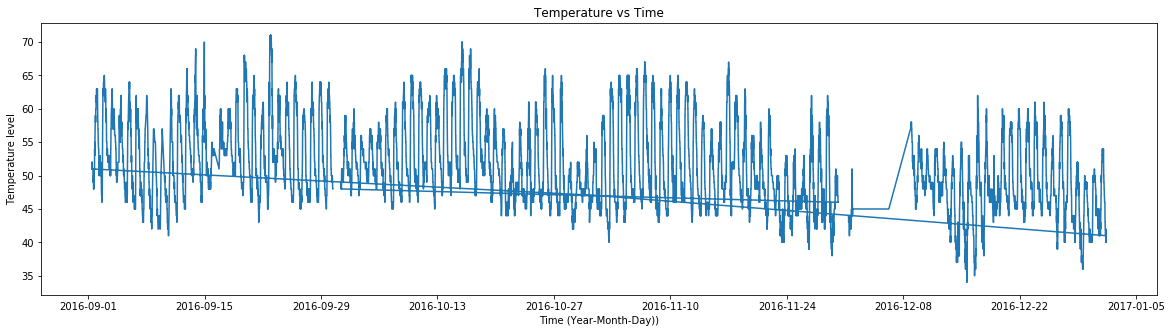

In [13]:
df_rad = train_Temperature.drop('DateTime', 1)
ts = df_rad['Temperature']
plt.figure(figsize= (20,5))
plt.title('Temperature vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('Temperature level')
plt.plot(ts)

In [14]:
train_Temperature['Date']=pd.to_datetime(train_Temperature.DateTime).dt.strftime('%Y-%m-%d')
train_Temperature.index = train_Temperature.Date
train_Temperature.head()

,Temperature,DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,48,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,48,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,48,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,48,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,48,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


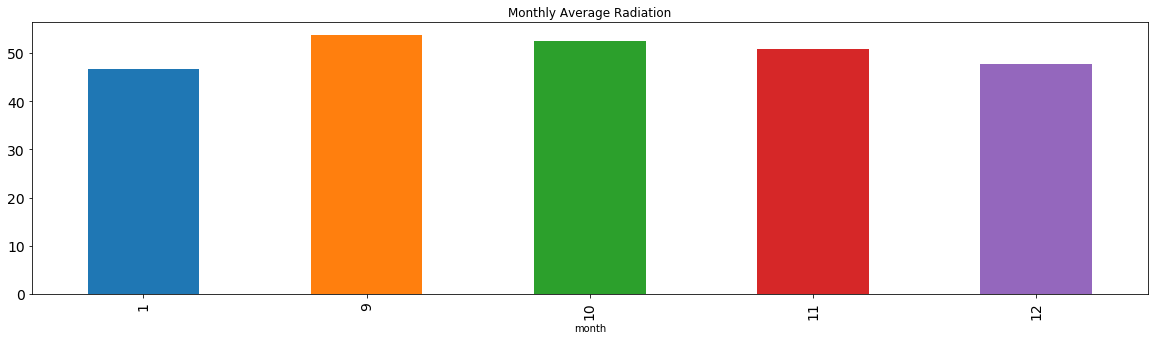

In [15]:
train_Temperature.groupby('month')['Temperature'].mean().plot.bar(figsize = (20,5),
                                                              title = 'Monthly Average Radiation',
                                                              fontsize = 14)

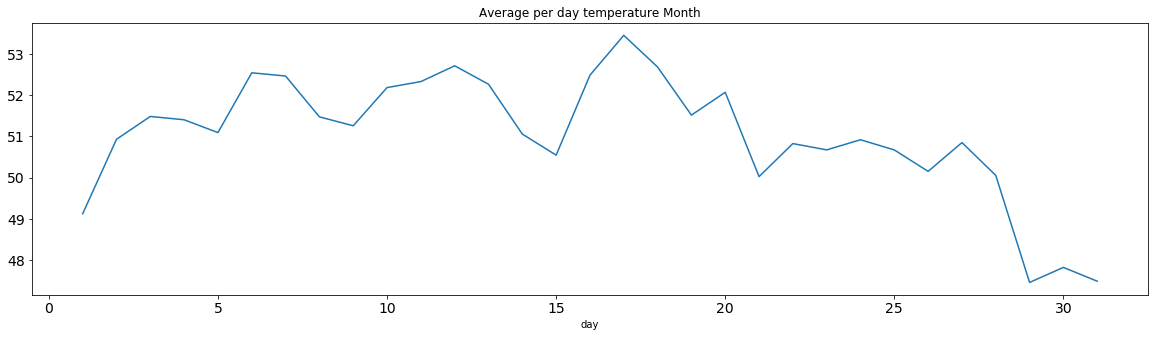

In [16]:
temp = train_Temperature.groupby(['day'])['Temperature'].mean()
temp.plot(figsize = (20,5), title = "Average per day temperature Month", fontsize = 14)

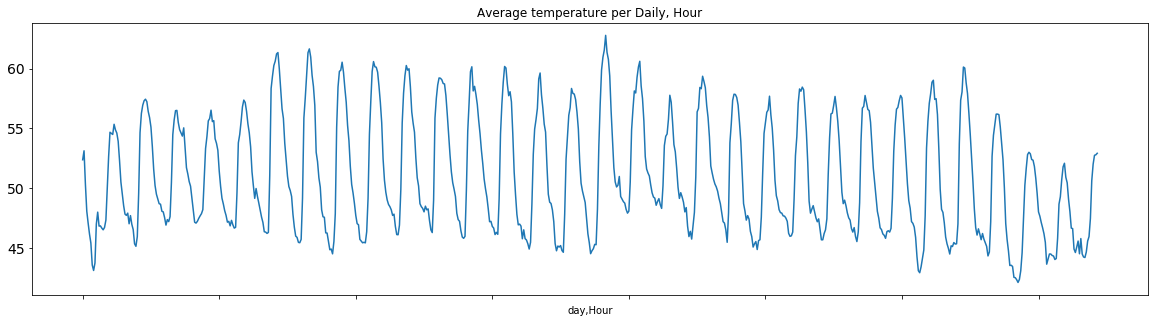

In [17]:
temp = train_Temperature.groupby(['day', 'Hour'])['Temperature'].mean()
temp.plot(figsize = (20,5), title = "Average temperature per Daily, Hour", fontsize = 14)

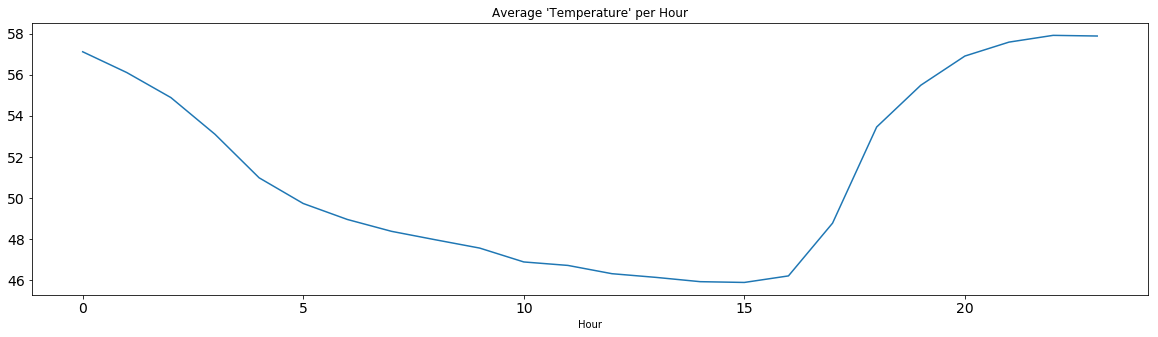

In [18]:
temp = train_Temperature.groupby(['Hour'])['Temperature'].mean()
temp.plot(figsize = (20,5), title = "Average 'Temperature' per Hour", fontsize = 14)

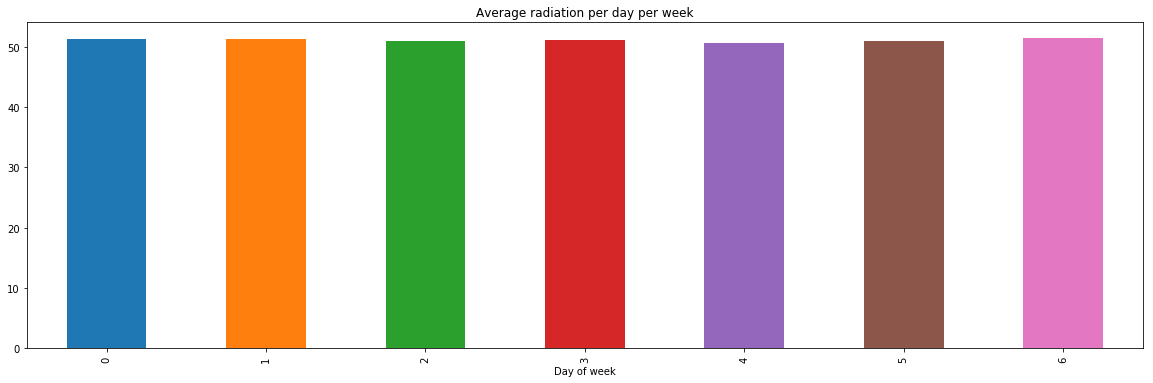

In [19]:
train_Temperature.groupby('Day of week')['Temperature'].mean().plot.bar(figsize = (20,6),
                                                                   title = 'Average radiation per day per week')

In [20]:
train_Temperature['Timestamp'] = pd.to_datetime(train_Temperature.DateTime, format = '%d-%m-%y %H:%M')
train_Temperature.index = train_Temperature.Timestamp

#Hourly
hourly = train_Temperature.resample('H').mean()

#Daily
daily = train_Temperature.resample('D').mean()

#Weekly
weekly = train_Temperature.resample('W').mean()
    
#Monthly
monthly = train_Temperature.resample('M').mean()

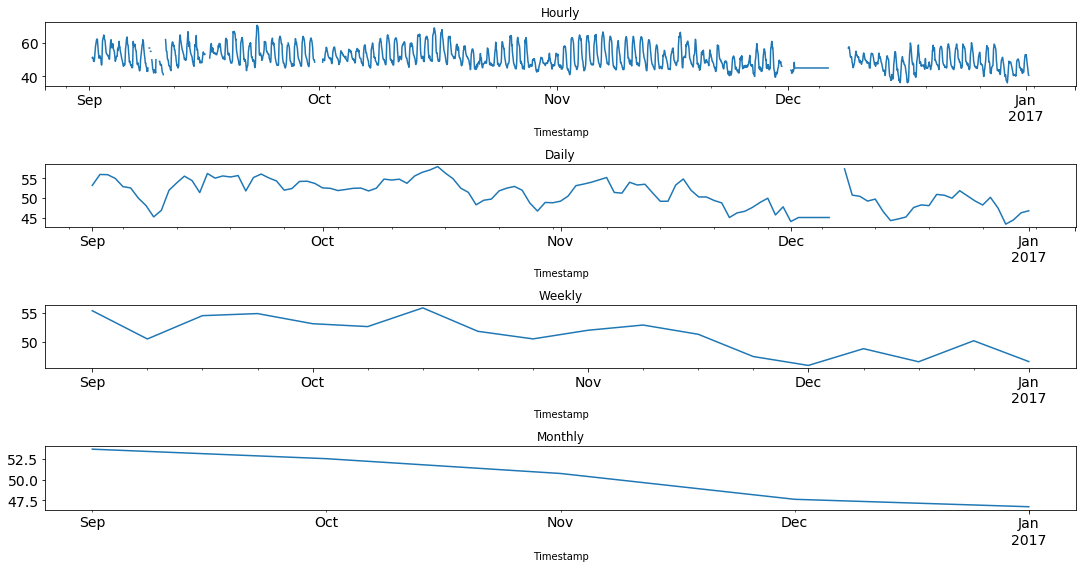

In [21]:
ig,axs = plt.subplots(4,1)

hourly.Temperature.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Temperature.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Temperature.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Temperature.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

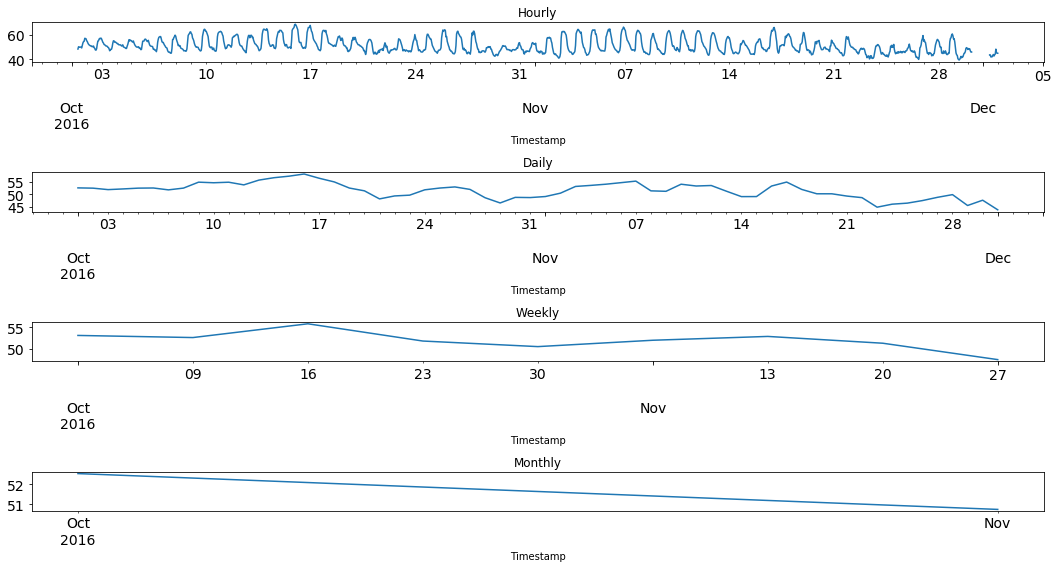

In [22]:
From = '2016-10-01'
To   = '2016-12-01'

hourly = hourly.loc[From:To,:]
daily = daily.loc[From:To,:]
weekly = weekly.loc[From:To,:] 
monthly = monthly.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
hourly.Temperature.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Temperature.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Temperature.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Temperature.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

In [23]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, ts):
    # Determining rolling statics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics
    orig = plt.plot(df[ts], color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red' , label = 'Average')
    std = plt.plot(rolstd, color = 'black', label = 'Standard deviation')
    
    plt.legend(loc = 'best')
    plt.title('Average and Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

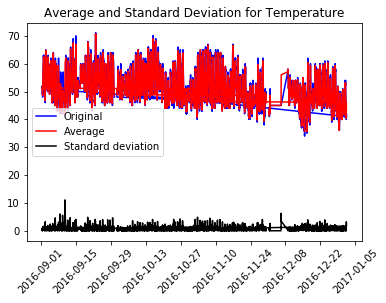

Results of Dickey-Fuller Test:
Test Statistic                -1.729760e+01
p-value                        5.654445e-30
# Lags Used                    4.500000e+01
Number of Observations Used    3.264000e+04
Critical Value (5%)           -2.861629e+00
Critical Value (10%)          -2.566817e+00
Critical Value (1%)           -3.430550e+00
dtype: float64


In [24]:
test_stationarity(df = train_Temperature, ts = 'Temperature')

In [25]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.80):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  print(testPredict)
  return testPredict

C:\Users\Anish Si\anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Epoch 1/5
 - 23s - loss: 0.0013
Epoch 2/5
 - 30s - loss: 2.3285e-04
Epoch 3/5
 - 24s - loss: 2.3301e-04
Epoch 4/5
 - 22s - loss: 2.3313e-04
Epoch 5/5
 - 22s - loss: 2.3201e-04
Train Score: 0.63 RMSE
Test Score: 0.53 RMSE


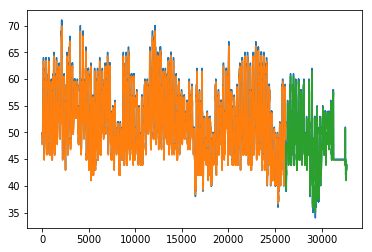

[[47.73134 ]
 [47.73134 ]
 [47.73134 ]
 ...
 [43.856606]
 [43.856606]
 [43.856606]]


In [26]:
fore_temperature=do_lstm_model(df = train_Temperature, 
              ts = 'Temperature', 
              look_back = 1, 
              epochs = 5)

In [27]:
fore_temperature

array([[47.73134 ],
       [47.73134 ],
       [47.73134 ],
       ...,
       [43.856606],
       [43.856606],
       [43.856606]], dtype=float32)

# For Humidity

In [28]:
train_Humidity = train.drop(['UNIXTime', 'Data', 'Time', 'Radiation','TimeSunRise', 'TimeSunSet',
                         'Pressure', 'Temperature', 'WindDirection(Degrees)', 'Speed' ], axis=1)

In [29]:
for i in (train_Humidity, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [30]:
train_Humidity['Day of week'] = train_Humidity['DateTime'].dt.dayofweek
temp_hum = train_Humidity['DateTime']

In [31]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_Humidity['DateTime'].apply(applyer)
train_Humidity['weekend'] = temp2

In [32]:
train_Humidity.index = train_Humidity['DateTime']

In [33]:
train_Humidity.head()

,Humidity,DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,59,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,58,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,57,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,60,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,62,2016-09-30 09:35:24,2016,9,30,9,4,0


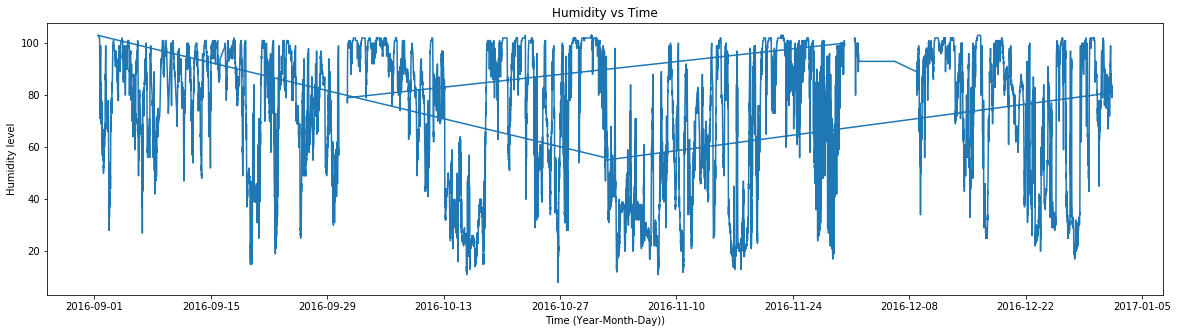

In [34]:
df_hum = train_Humidity.drop('DateTime', 1)
ts = df_hum['Humidity']
plt.figure(figsize= (20,5))
plt.title('Humidity vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('Humidity level')
plt.plot(ts)

In [35]:
train_Humidity['Date']=pd.to_datetime(train_Humidity.DateTime).dt.strftime('%Y-%m-%d')
train_Humidity.index = train_Humidity.Date
train_Humidity.head()

,Humidity,DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,59,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,58,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,57,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,60,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,62,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


In [36]:
train_Humidity['Timestamp'] = pd.to_datetime(train_Humidity.DateTime, format = '%d-%m-%y %H:%M')
train_Humidity.index = train_Humidity.Timestamp

#Hourly
hourly = train_Humidity.resample('H').mean()

#Daily
daily = train_Humidity.resample('D').mean()

#Weekly
weekly = train_Humidity.resample('W').mean()
    
#Monthly
monthly = train_Humidity.resample('M').mean()

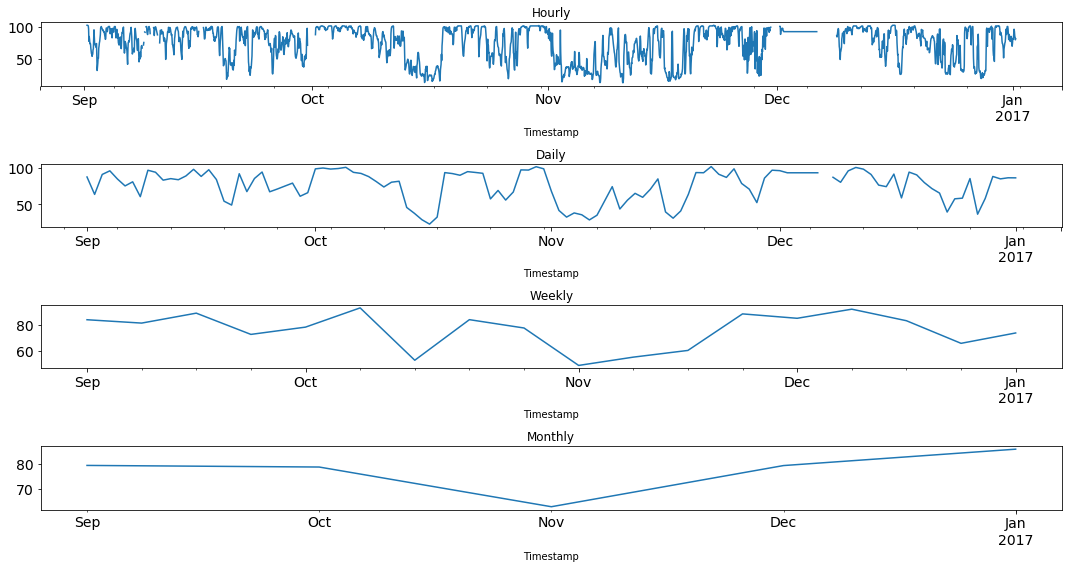

In [37]:
ig,axs = plt.subplots(4,1)

hourly.Humidity.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Humidity.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Humidity.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Humidity.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

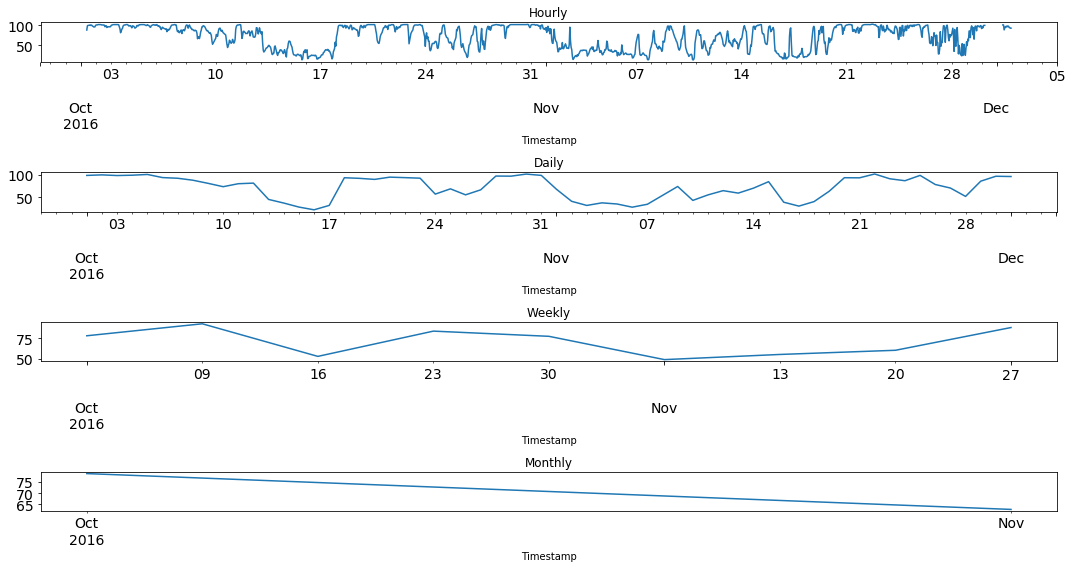

In [38]:
From = '2016-10-01'
To   = '2016-12-01'

hourly = hourly.loc[From:To,:]
daily = daily.loc[From:To,:]
weekly = weekly.loc[From:To,:] 
monthly = monthly.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
hourly.Humidity.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Humidity.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Humidity.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Humidity.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

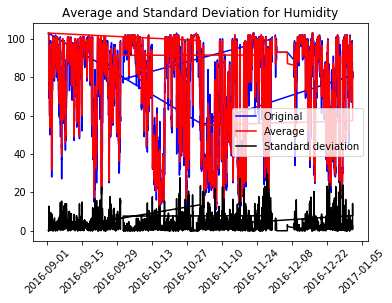

Results of Dickey-Fuller Test:
Test Statistic                -9.239943e+00
p-value                        1.592561e-15
# Lags Used                    3.600000e+01
Number of Observations Used    3.264900e+04
Critical Value (5%)           -2.861629e+00
Critical Value (10%)          -2.566817e+00
Critical Value (1%)           -3.430550e+00
dtype: float64


In [39]:
test_stationarity(df = train_Humidity, ts = 'Humidity')

Epoch 1/50
 - 24s - loss: 0.0033
Epoch 2/50
 - 24s - loss: 0.0011
Epoch 3/50
 - 23s - loss: 0.0011
Epoch 4/50
 - 23s - loss: 0.0011
Epoch 5/50
 - 25s - loss: 0.0011
Epoch 6/50
 - 27s - loss: 0.0011
Epoch 7/50
 - 29s - loss: 0.0011
Epoch 8/50
 - 31s - loss: 0.0011
Epoch 9/50
 - 27s - loss: 0.0011
Epoch 10/50
 - 24s - loss: 0.0011
Epoch 11/50
 - 22s - loss: 0.0011
Epoch 12/50
 - 23s - loss: 0.0011
Epoch 13/50
 - 22s - loss: 0.0011
Epoch 14/50
 - 22s - loss: 0.0011
Epoch 15/50
 - 22s - loss: 0.0011
Epoch 16/50
 - 23s - loss: 0.0011
Epoch 17/50
 - 22s - loss: 0.0011
Epoch 18/50
 - 22s - loss: 0.0011
Epoch 19/50
 - 22s - loss: 0.0011
Epoch 20/50
 - 22s - loss: 0.0010
Epoch 21/50
 - 22s - loss: 0.0010
Epoch 22/50
 - 22s - loss: 0.0010
Epoch 23/50
 - 22s - loss: 0.0010
Epoch 24/50
 - 22s - loss: 0.0010
Epoch 25/50
 - 23s - loss: 0.0010
Epoch 26/50
 - 22s - loss: 0.0010
Epoch 27/50
 - 22s - loss: 0.0010
Epoch 28/50
 - 22s - loss: 0.0010
Epoch 29/50
 - 22s - loss: 0.0010
Epoch 30/50
 - 24s - lo

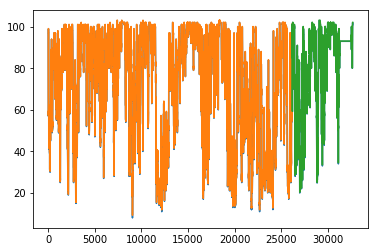

[[101.1389 ]
 [101.1389 ]
 [101.1389 ]
 ...
 [102.14127]
 [102.14127]
 [102.14127]]


In [40]:
fore_humidity=do_lstm_model(df = train_Humidity, 
              ts = 'Humidity', 
              look_back = 1, 
              epochs = 50)

# For Pressure

In [41]:
train_Pressure = train.drop(['UNIXTime', 'Data', 'Time', 'Radiation','TimeSunRise', 'TimeSunSet',
                         'Humidity', 'Temperature', 'WindDirection(Degrees)', 'Speed' ], axis=1)

In [42]:
for i in (train_Pressure, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [43]:
train_Pressure['Day of week'] = train_Pressure['DateTime'].dt.dayofweek
temp_pre = train_Pressure['DateTime']

In [44]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_Pressure['DateTime'].apply(applyer)
train_Pressure['weekend'] = temp2

In [45]:
train_Pressure.index = train_Pressure['DateTime']

In [46]:
train_Pressure.head()

,Pressure,DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,30.46,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,30.46,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,30.46,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,30.46,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,30.46,2016-09-30 09:35:24,2016,9,30,9,4,0


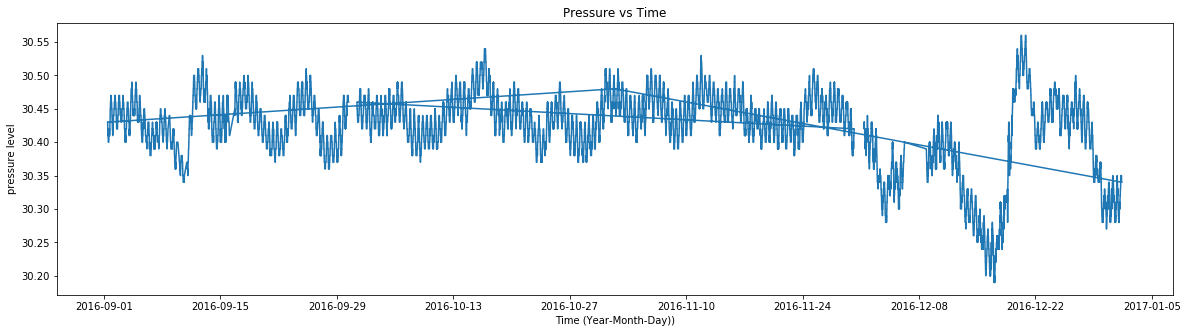

In [47]:
df_pre = train_Pressure.drop('DateTime', 1)
ts = df_pre['Pressure']
plt.figure(figsize= (20,5))
plt.title('Pressure vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('pressure level')
plt.plot(ts)

In [48]:
train_Pressure['Date']=pd.to_datetime(train_Pressure.DateTime).dt.strftime('%Y-%m-%d')
train_Pressure.index = train_Pressure.Date
train_Pressure.head()

,Pressure,DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,30.46,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,30.46,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,30.46,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,30.46,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,30.46,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


In [49]:
train_Pressure['Timestamp'] = pd.to_datetime(train_Pressure.DateTime, format = '%d-%m-%y %H:%M')
train_Pressure.index = train_Pressure.Timestamp

#Hourly
hourly = train_Pressure.resample('H').mean()

#Daily
daily = train_Pressure.resample('D').mean()

#Weekly
weekly = train_Pressure.resample('W').mean()
    
#Monthly
monthly = train_Pressure.resample('M').mean()

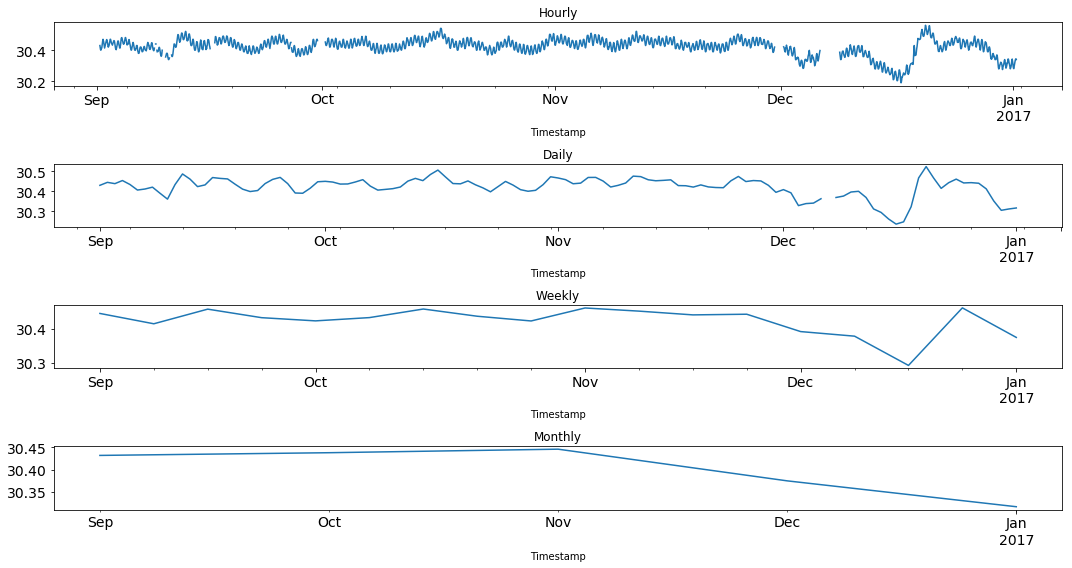

In [50]:
ig,axs = plt.subplots(4,1)

hourly.Pressure.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Pressure.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Pressure.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Pressure.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

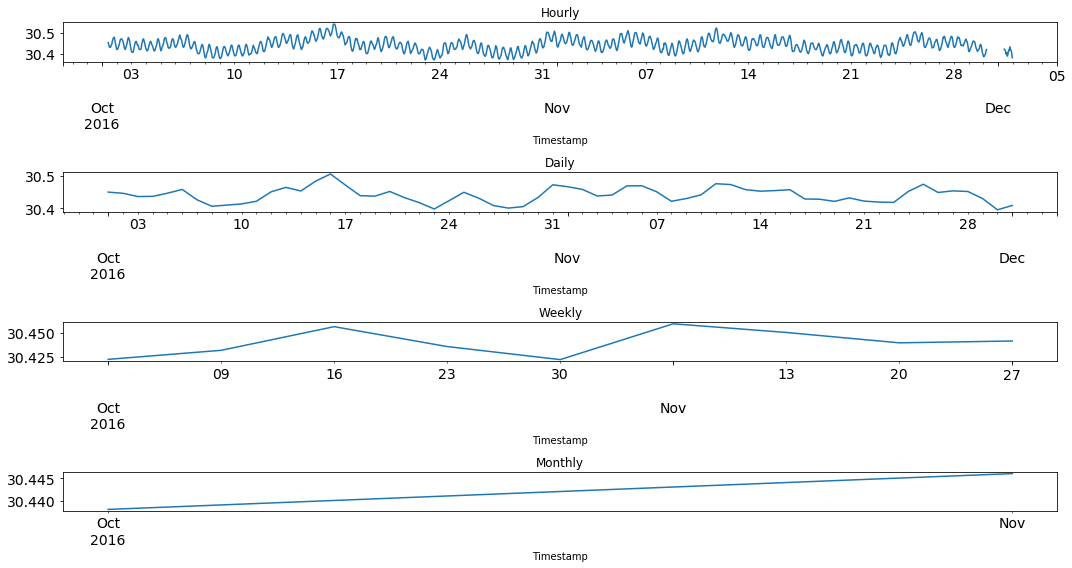

In [51]:
From = '2016-10-01'
To   = '2016-12-01'

hourly = hourly.loc[From:To,:]
daily = daily.loc[From:To,:]
weekly = weekly.loc[From:To,:] 
monthly = monthly.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
hourly.Pressure.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Pressure.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Pressure.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Pressure.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

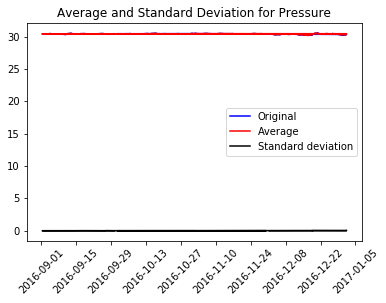

Results of Dickey-Fuller Test:
Test Statistic                -6.097370e+00
p-value                        1.002528e-07
# Lags Used                    5.200000e+01
Number of Observations Used    3.263300e+04
Critical Value (5%)           -2.861629e+00
Critical Value (10%)          -2.566817e+00
Critical Value (1%)           -3.430550e+00
dtype: float64


In [52]:
test_stationarity(df = train_Pressure, ts = 'Pressure')

Epoch 1/10
 - 22s - loss: 0.0015
Epoch 2/10
 - 23s - loss: 1.3203e-04
Epoch 3/10
 - 25s - loss: 1.2881e-04
Epoch 4/10
 - 26s - loss: 1.2799e-04
Epoch 5/10
 - 24s - loss: 1.2776e-04
Epoch 6/10
 - 24s - loss: 1.2766e-04
Epoch 7/10
 - 23s - loss: 1.2713e-04
Epoch 8/10
 - 23s - loss: 1.2643e-04
Epoch 9/10
 - 21s - loss: 1.2688e-04
Epoch 10/10
 - 21s - loss: 1.2732e-04
Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


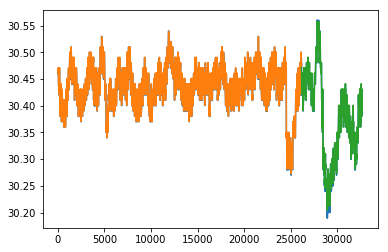

[[30.471106]
 [30.471106]
 [30.471106]
 ...
 [30.431164]
 [30.42108 ]
 [30.42108 ]]


In [53]:
fore_pressure=do_lstm_model(df = train_Pressure, 
              ts = 'Pressure', 
              look_back = 1, 
              epochs = 10)

# Wind-Direction

In [54]:
train_WindDirection = train.drop(['UNIXTime', 'Data', 'Time', 'Radiation','TimeSunRise', 'TimeSunSet',
                         'Humidity', 'Temperature', 'Pressure', 'Speed' ], axis=1)

In [55]:
for i in (train_WindDirection, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [56]:
train_WindDirection['Day of week'] = train_WindDirection['DateTime'].dt.dayofweek
temp_wd = train_WindDirection['DateTime']

In [57]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_WindDirection['DateTime'].apply(applyer)
train_WindDirection['weekend'] = temp2

In [58]:
train_WindDirection.index = train_WindDirection['DateTime']

In [59]:
train_WindDirection.head()

,WindDirection(Degrees),DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,177.39,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,176.78,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,158.75,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,137.71,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,104.95,2016-09-30 09:35:24,2016,9,30,9,4,0


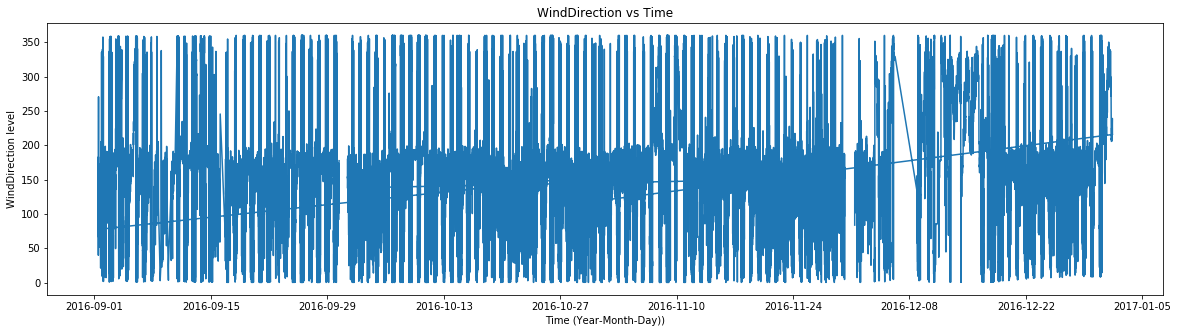

In [60]:
df_wd =train_WindDirection.drop('DateTime', 1)
ts = df_wd['WindDirection(Degrees)']
plt.figure(figsize= (20,5))
plt.title('WindDirection vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('WindDirection level')
plt.plot(ts)

In [61]:
train_WindDirection['Date']=pd.to_datetime(train_WindDirection.DateTime).dt.strftime('%Y-%m-%d')
train_WindDirection.index = train_WindDirection.Date
train_WindDirection.head()

,WindDirection(Degrees),DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,177.39,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,176.78,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,158.75,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,137.71,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,104.95,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


In [62]:
train_WindDirection['Timestamp'] = pd.to_datetime(train_WindDirection.DateTime, format = '%d-%m-%y %H:%M')
train_WindDirection.index = train_WindDirection.Timestamp

#Hourly
hourly = train_WindDirection.resample('H').mean()

#Daily
daily = train_WindDirection.resample('D').mean()

#Weekly
weekly = train_WindDirection.resample('W').mean()
    
#Monthly
monthly = train_WindDirection.resample('M').mean()

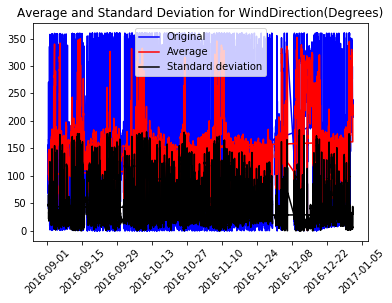

Results of Dickey-Fuller Test:
Test Statistic                -1.437776e+01
p-value                        9.262442e-27
# Lags Used                    2.700000e+01
Number of Observations Used    3.265800e+04
Critical Value (5%)           -2.861629e+00
Critical Value (10%)          -2.566817e+00
Critical Value (1%)           -3.430550e+00
dtype: float64


In [63]:
test_stationarity(df = train_WindDirection, ts = 'WindDirection(Degrees)')

In [64]:
def do_lstm_model1(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.80):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(256, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(256, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(256, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(256, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(256, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  print(testPredict)
  return testPredict

Epoch 1/10
 - 23s - loss: 0.0383
Epoch 2/10
 - 23s - loss: 0.0377
Epoch 3/10
 - 22s - loss: 0.0375
Epoch 4/10
 - 22s - loss: 0.0374
Epoch 5/10
 - 26s - loss: 0.0372
Epoch 6/10
 - 23s - loss: 0.0371
Epoch 7/10
 - 22s - loss: 0.0369
Epoch 8/10
 - 22s - loss: 0.0367
Epoch 9/10
 - 22s - loss: 0.0364
Epoch 10/10
 - 22s - loss: 0.0364
Train Score: 68.38 RMSE
Test Score: 66.24 RMSE


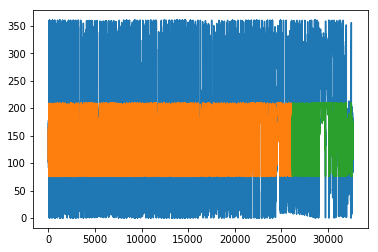

[[134.50247 ]
 [174.01239 ]
 [129.33835 ]
 ...
 [139.38454 ]
 [117.066666]
 [139.18956 ]]


In [65]:
fore_winddir=do_lstm_model(df = train_WindDirection, 
              ts = 'WindDirection(Degrees)', 
              look_back = 1, 
              epochs = 10)

# Wind speed

In [66]:
train_Speed = train.drop(['UNIXTime', 'Data', 'Time', 'Radiation','TimeSunRise', 'TimeSunSet',
                         'Humidity', 'Temperature', 'Pressure', 'WindDirection(Degrees)' ], axis=1)

In [67]:
for i in (train_Speed, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [68]:
train_Speed['Day of week'] = train_Speed['DateTime'].dt.dayofweek
temp_speed = train_Speed['DateTime']

In [69]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_Speed['DateTime'].apply(applyer)
train_Speed['weekend'] = temp2

In [70]:
train_Speed.index = train_Speed['DateTime']

In [71]:
train_Speed.head()

,Speed,DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,5.62,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,3.37,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,3.37,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,3.37,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,5.62,2016-09-30 09:35:24,2016,9,30,9,4,0


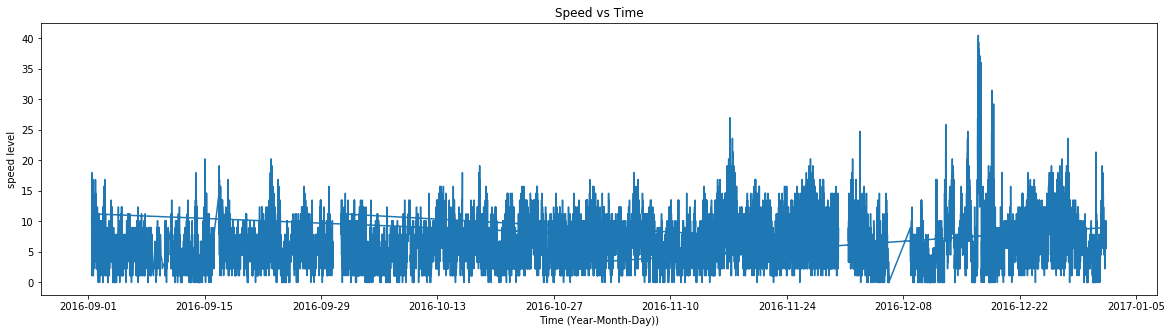

In [72]:
df_speed = train_Speed.drop('DateTime', 1)
ts = df_speed['Speed']
plt.figure(figsize= (20,5))
plt.title('Speed vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('speed level')
plt.plot(ts)

In [73]:
train_Speed['Date']=pd.to_datetime(train_Speed.DateTime).dt.strftime('%Y-%m-%d')
train_Speed.index = train_Speed.Date
train_Speed.head()

,Speed,DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,5.62,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,3.37,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,3.37,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,3.37,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,5.62,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


In [74]:
train_Speed['Timestamp'] = pd.to_datetime(train_Speed.DateTime, format = '%d-%m-%y %H:%M')
train_Speed.index = train_Speed.Timestamp

#Hourly
hourly = train_Speed.resample('H').mean()

#Daily
daily = train_Speed.resample('D').mean()

#Weekly
weekly = train_Speed.resample('W').mean()
    
#Monthly
monthly = train_Speed.resample('M').mean()

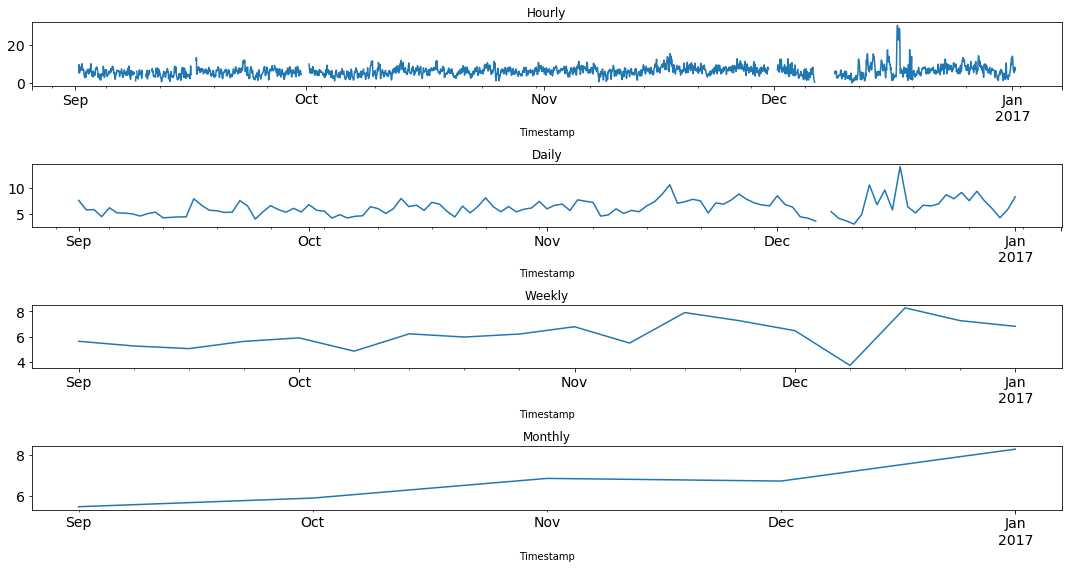

In [75]:
ig,axs = plt.subplots(4,1)

hourly.Speed.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Speed.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Speed.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Speed.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

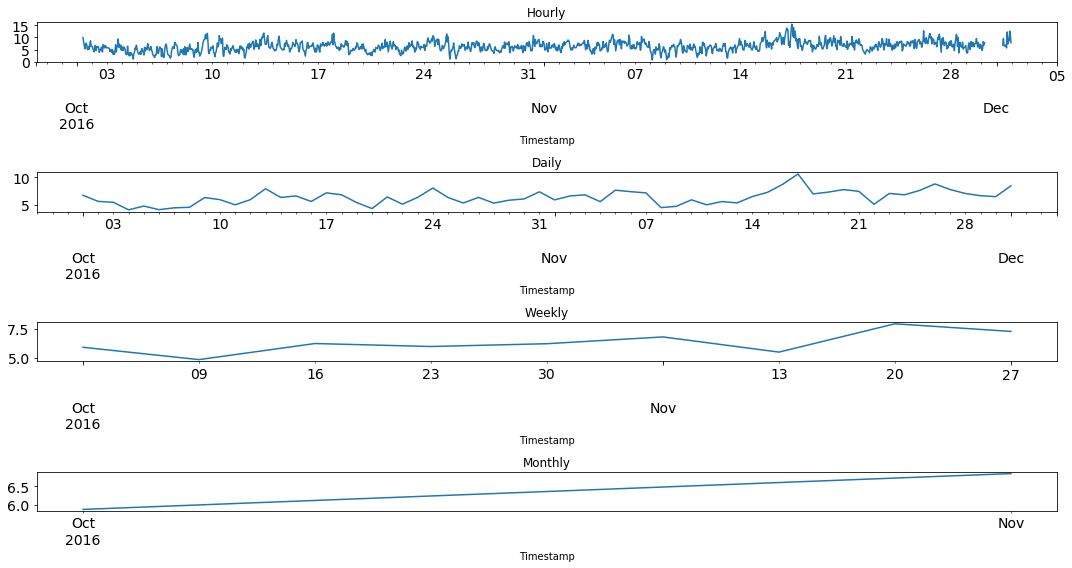

In [76]:
From = '2016-10-01'
To   = '2016-12-01'

hourly = hourly.loc[From:To,:]
daily = daily.loc[From:To,:]
weekly = weekly.loc[From:To,:] 
monthly = monthly.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
hourly.Speed.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Speed.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Speed.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Speed.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

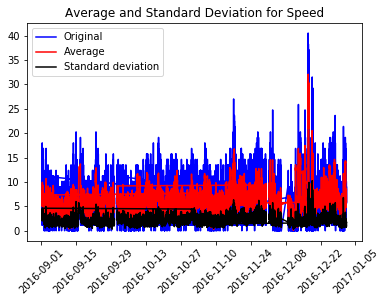

Results of Dickey-Fuller Test:
Test Statistic                -1.541594e+01
p-value                        3.079335e-28
# Lags Used                    3.300000e+01
Number of Observations Used    3.265200e+04
Critical Value (5%)           -2.861629e+00
Critical Value (10%)          -2.566817e+00
Critical Value (1%)           -3.430550e+00
dtype: float64


In [77]:
test_stationarity(df = train_Speed, ts = 'Speed')

Epoch 1/10
 - 225s - loss: 0.0047
Epoch 2/10
 - 226s - loss: 0.0046
Epoch 3/10
 - 217s - loss: 0.0046
Epoch 4/10
 - 217s - loss: 0.0045
Epoch 5/10
 - 223s - loss: 0.0045
Epoch 6/10
 - 224s - loss: 0.0045
Epoch 7/10
 - 222s - loss: 0.0045
Epoch 8/10
 - 229s - loss: 0.0045
Epoch 9/10
 - 232s - loss: 0.0045
Epoch 10/10
 - 220s - loss: 0.0045
Train Score: 2.72 RMSE
Test Score: 3.49 RMSE


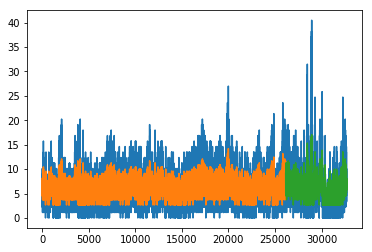

[[9.110989]
 [5.675687]
 [8.178951]
 ...
 [6.719368]
 [6.719368]
 [7.703421]]


In [78]:
fore_speed=do_lstm_model1(df = train_Speed, 
              ts = 'Speed', 
              look_back = 1, 
              epochs = 10)

# Prediction Purpose

In [3]:
df_pred=train.drop(["UNIXTime",'Data','Time','TimeSunRise','TimeSunSet','DateTime'],axis=1)
df_pred

NameError: name 'train' is not defined

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split

In [81]:
X=df_pred[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

In [82]:
y=df_pred["Radiation"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [84]:
train = df_pred[0:int(len(df_pred)*0.80)]
test = df_pred[int(len(df_pred)*0.80)+2:]

In [85]:
X_train=train[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]
X_test=test[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

In [86]:
y_train=train["Radiation"]
y_test=test["Radiation"]


# multiple linear regression

In [87]:
from numpy.linalg import inv

In [88]:
dX = []
Y = list(y_train)
for i in range(len(y_train)):
    dX.append([])
    dX[i].append(1)
    dX[i].append(float(X_train['Temperature'][i]))
    dX[i].append(float(X_train['Pressure'][i]))
    dX[i].append(float(X_train['Humidity'][i]))
    #dX[i].append(float(X_train['WindDirection(Degrees)'][i]))
    dX[i].append(float(X_train['Speed'][i]))
    
matX = np.array(dX)
mat_inv = inv(matX.T.dot(matX))
temp = mat_inv.dot(matX.T)
beta = temp.dot(Y)
print(beta)

[ 1.88547376e+04  4.03411294e+01 -6.82910468e+02 -1.30412216e-01
  1.13969162e+01]


RMSE:172.5978


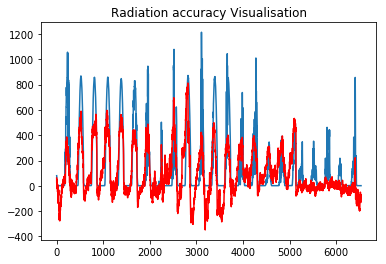

In [89]:
actualrad = list(y_test)
predrad=[]
for i in range(len(y_test)):
    predrad.append(float("%.2f"%(beta[0] + beta[1]*fore_temperature[i] + beta[2]*fore_pressure[i] + beta[3]*fore_humidity[i]  + beta[4]*fore_speed[i])))

plt.title("Radiation accuracy Visualisation")
plt.plot(np.array(actualrad))
plt.plot(np.array(predrad), color="red")
print('RMSE:%.4f'% np.sqrt(sum((np.array(predrad) - np.array(actualrad))**2)/len(np.array(actualrad))))

# Data frame build

In [90]:
df_build = pd.DataFrame(list(zip(fore_temperature, fore_pressure, fore_humidity, fore_winddir, fore_speed)), 
               columns =['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']) 
df_build 

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,[47.73134],[30.471106],[101.1389],[134.50247],[9.110989]
1,[47.73134],[30.471106],[101.1389],[174.01239],[5.675687]
2,[47.73134],[30.471106],[101.1389],[129.33835],[8.178951]
3,[47.73134],[30.471106],[101.1389],[152.36069],[6.203952]
4,[47.73134],[30.471106],[101.1389],[138.65584],[7.2152233]
5,[47.73134],[30.471106],[101.1389],[159.33809],[8.178951]
6,[47.73134],[30.461193],[101.1389],[147.59535],[7.2152233]
7,[46.753357],[30.461193],[101.1389],[88.86581],[7.2152233]
8,[46.753357],[30.461193],[101.1389],[162.37596],[5.1214347]
9,[46.753357],[30.461193],[101.1389],[127.609634],[6.203952]


#  Random Forest Estimator

In [91]:
from sklearn.ensemble import RandomForestRegressor 

In [92]:
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 12) 

In [93]:
regressor.fit(X_train,y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [94]:
pred2=regressor.predict(df_build)

RMSE:164.9847


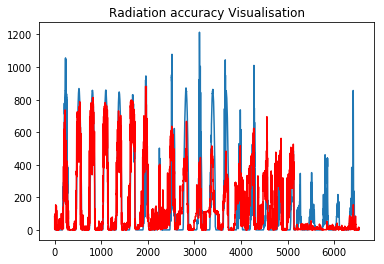

In [95]:
plt.title("Radiation accuracy Visualisation")
plt.plot(np.array(y_test))
plt.plot(np.array(pred2), color="red")

print('RMSE:%.4f'% np.sqrt(sum((np.array(pred2) - np.array(y_test))**2)/len(np.array(y_test))))

# GRADIENT BOOSTING

In [96]:
from sklearn import ensemble

In [97]:
params = {'n_estimators': 10000, 'max_depth': 4, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
model2 = ensemble.GradientBoostingRegressor(**params)
model2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=10000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [98]:
pred3=model2.predict(df_build)

RMSE:160.8206


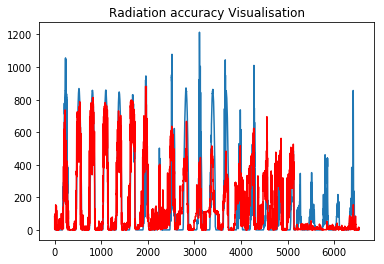

In [99]:
plt.title("Radiation accuracy Visualisation")
plt.plot(np.array(y_test))
plt.plot(np.array(pred2), color="red")

print('RMSE:%.4f'% np.sqrt(sum((np.array(pred3) - np.array(y_test))**2)/len(np.array(y_test))))

#  Convolutional NEURAL NETWORK

In [100]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import layers

In [101]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_7 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 35        
__________

In [102]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [133]:
history = model.fit(X_train, y_train, epochs=8000, batch_size=50,  verbose=1)

Epoch 1/8000
26148/26148 [==============================] - 8s 297us/step - loss: 31504.6915 - mean_squared_error: 31504.6915 - mean_absolute_error: 108.4119
Epoch 2/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31640.4119 - mean_squared_error: 31640.4119 - mean_absolute_error: 108.6346
Epoch 3/8000
26148/26148 [==============================] - 1s 28us/step - loss: 31453.6074 - mean_squared_error: 31453.6074 - mean_absolute_error: 108.1857
Epoch 4/8000
26148/26148 [==============================] - 1s 31us/step - loss: 31519.7945 - mean_squared_error: 31519.7945 - mean_absolute_error: 108.4061
Epoch 5/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31656.0035 - mean_squared_error: 31656.0035 - mean_absolute_error: 109.0042
Epoch 6/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31535.2281 - mean_squared_error: 31535.2281 - mean_absolute_error: 108.6749
Epoch 7/8000
26148/26148 [==============================]

26148/26148 [==============================] - 0s 18us/step - loss: 31605.3334 - mean_squared_error: 31605.3334 - mean_absolute_error: 108.5630
Epoch 104/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31577.0063 - mean_squared_error: 31577.0063 - mean_absolute_error: 109.0066
Epoch 105/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31515.6788 - mean_squared_error: 31515.6788 - mean_absolute_error: 108.4311
Epoch 106/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31551.0695 - mean_squared_error: 31551.0695 - mean_absolute_error: 108.7097
Epoch 107/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31491.5796 - mean_squared_error: 31491.5796 - mean_absolute_error: 108.4515
Epoch 108/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31599.1167 - mean_squared_error: 31599.1167 - mean_absolute_error: 108.2878
Epoch 109/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 1s 27us/step - loss: 31445.1155 - mean_squared_error: 31445.1155 - mean_absolute_error: 108.4838
Epoch 206/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31681.9014 - mean_squared_error: 31681.9014 - mean_absolute_error: 108.6773
Epoch 207/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31566.0806 - mean_squared_error: 31566.0806 - mean_absolute_error: 108.9242
Epoch 208/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31454.1874 - mean_squared_error: 31454.1874 - mean_absolute_error: 108.6044
Epoch 209/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31612.0279 - mean_squared_error: 31612.0279 - mean_absolute_error: 108.9937
Epoch 210/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31658.3840 - mean_squared_error: 31658.3840 - mean_absolute_error: 108.5337
Epoch 211/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 1s 21us/step - loss: 31526.1256 - mean_squared_error: 31526.1256 - mean_absolute_error: 108.9306
Epoch 308/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31562.0976 - mean_squared_error: 31562.0976 - mean_absolute_error: 108.8121
Epoch 309/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31503.8203 - mean_squared_error: 31503.8203 - mean_absolute_error: 108.6379
Epoch 310/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31526.8858 - mean_squared_error: 31526.8858 - mean_absolute_error: 108.4432
Epoch 311/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31518.2022 - mean_squared_error: 31518.2022 - mean_absolute_error: 108.5768
Epoch 312/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31501.4486 - mean_squared_error: 31501.4486 - mean_absolute_error: 108.4410
Epoch 313/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 0s 19us/step - loss: 31500.3674 - mean_squared_error: 31500.3674 - mean_absolute_error: 108.5405
Epoch 410/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31552.4107 - mean_squared_error: 31552.4107 - mean_absolute_error: 108.2972
Epoch 411/8000
26148/26148 [==============================] - 1s 29us/step - loss: 31585.4494 - mean_squared_error: 31585.4494 - mean_absolute_error: 108.6442
Epoch 412/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31552.6640 - mean_squared_error: 31552.6640 - mean_absolute_error: 109.1764
Epoch 413/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31508.1334 - mean_squared_error: 31508.1334 - mean_absolute_error: 108.7761
Epoch 414/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31553.0738 - mean_squared_error: 31553.0738 - mean_absolute_error: 108.8458
Epoch 415/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 1s 19us/step - loss: 31497.9219 - mean_squared_error: 31497.9219 - mean_absolute_error: 108.5069
Epoch 512/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31554.4475 - mean_squared_error: 31554.4475 - mean_absolute_error: 108.5204
Epoch 513/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31629.9447 - mean_squared_error: 31629.9447 - mean_absolute_error: 108.8314
Epoch 514/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31526.2798 - mean_squared_error: 31526.2798 - mean_absolute_error: 108.6402
Epoch 515/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31428.1302 - mean_squared_error: 31428.1302 - mean_absolute_error: 108.4800
Epoch 516/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31547.2593 - mean_squared_error: 31547.2593 - mean_absolute_error: 108.1911
Epoch 517/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 0s 18us/step - loss: 31552.6827 - mean_squared_error: 31552.6827 - mean_absolute_error: 108.7072
Epoch 612/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31554.8297 - mean_squared_error: 31554.8297 - mean_absolute_error: 108.6829
Epoch 613/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31490.9592 - mean_squared_error: 31490.9592 - mean_absolute_error: 108.0173
Epoch 614/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31642.8833 - mean_squared_error: 31642.8833 - mean_absolute_error: 108.5998
Epoch 615/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31498.4211 - mean_squared_error: 31498.4211 - mean_absolute_error: 108.7497
Epoch 616/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31519.3259 - mean_squared_error: 31519.3259 - mean_absolute_error: 108.5298
Epoch 617/8000
26148/26148 [==============================] -

26148/26148 [==============================] - ETA: 0s - loss: 31629.5887 - mean_squared_error: 31629.5887 - mean_absolute_error: 108.46 - 0s 17us/step - loss: 31542.8441 - mean_squared_error: 31542.8441 - mean_absolute_error: 108.3171
Epoch 713/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31601.4146 - mean_squared_error: 31601.4146 - mean_absolute_error: 108.8266
Epoch 714/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31456.6778 - mean_squared_error: 31456.6778 - mean_absolute_error: 108.2648
Epoch 715/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31529.2523 - mean_squared_error: 31529.2523 - mean_absolute_error: 108.6801
Epoch 716/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31570.7595 - mean_squared_error: 31570.7595 - mean_absolute_error: 108.6915
Epoch 717/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31507.0295 - mean_squared_error: 31507.0295 -

26148/26148 [==============================] - 0s 17us/step - loss: 31556.8638 - mean_squared_error: 31556.8638 - mean_absolute_error: 108.4588
Epoch 764/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31586.4385 - mean_squared_error: 31586.4385 - mean_absolute_error: 108.9068
Epoch 765/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31453.0200 - mean_squared_error: 31453.0200 - mean_absolute_error: 108.5177
Epoch 766/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31531.6416 - mean_squared_error: 31531.6416 - mean_absolute_error: 108.2905
Epoch 767/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31873.1453 - mean_squared_error: 31873.1453 - mean_absolute_error: 109.2809
Epoch 768/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31659.4465 - mean_squared_error: 31659.4465 - mean_absolute_error: 108.8886
Epoch 769/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 0s 16us/step - loss: 31479.1622 - mean_squared_error: 31479.1622 - mean_absolute_error: 108.0867
Epoch 866/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31566.3635 - mean_squared_error: 31566.3635 - mean_absolute_error: 108.4789
Epoch 867/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31600.4465 - mean_squared_error: 31600.4465 - mean_absolute_error: 108.6291
Epoch 868/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31566.1860 - mean_squared_error: 31566.1860 - mean_absolute_error: 108.0381
Epoch 869/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31643.3708 - mean_squared_error: 31643.3708 - mean_absolute_error: 108.7185
Epoch 870/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31488.0133 - mean_squared_error: 31488.0133 - mean_absolute_error: 108.3988
Epoch 871/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 0s 17us/step - loss: 31609.6238 - mean_squared_error: 31609.6238 - mean_absolute_error: 108.5985
Epoch 968/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31522.0732 - mean_squared_error: 31522.0732 - mean_absolute_error: 108.3959
Epoch 969/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31515.8212 - mean_squared_error: 31515.8212 - mean_absolute_error: 108.6574
Epoch 970/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31523.6725 - mean_squared_error: 31523.6725 - mean_absolute_error: 108.4674
Epoch 971/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31616.8150 - mean_squared_error: 31616.8150 - mean_absolute_error: 108.4500
Epoch 972/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31404.9810 - mean_squared_error: 31404.9810 - mean_absolute_error: 108.3410
Epoch 973/8000
26148/26148 [==============================] -

26148/26148 [==============================] - 0s 17us/step - loss: 31532.6065 - mean_squared_error: 31532.6065 - mean_absolute_error: 108.3065
Epoch 1070/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31486.7791 - mean_squared_error: 31486.7791 - mean_absolute_error: 108.4993
Epoch 1071/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31549.3521 - mean_squared_error: 31549.3521 - mean_absolute_error: 108.5404
Epoch 1072/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31493.6824 - mean_squared_error: 31493.6824 - mean_absolute_error: 108.1812
Epoch 1073/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31555.7178 - mean_squared_error: 31555.7178 - mean_absolute_error: 108.8709
Epoch 1074/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31537.0225 - mean_squared_error: 31537.0225 - mean_absolute_error: 108.2651
Epoch 1075/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31574.0125 - mean_squared_error: 31574.0125 - mean_absolute_error: 108.6133
Epoch 1172/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31455.3172 - mean_squared_error: 31455.3172 - mean_absolute_error: 108.0971
Epoch 1173/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31569.9080 - mean_squared_error: 31569.9080 - mean_absolute_error: 108.5177
Epoch 1174/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31400.8921 - mean_squared_error: 31400.8921 - mean_absolute_error: 108.3591
Epoch 1175/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31421.1939 - mean_squared_error: 31421.1939 - mean_absolute_error: 108.2661
Epoch 1176/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31613.4107 - mean_squared_error: 31613.4107 - mean_absolute_error: 108.8928
Epoch 1177/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31488.8475 - mean_squared_error: 31488.8475 - mean_absolute_error: 108.3466
Epoch 1274/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31424.8003 - mean_squared_error: 31424.8003 - mean_absolute_error: 108.3308
Epoch 1275/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31356.3413 - mean_squared_error: 31356.3413 - mean_absolute_error: 108.1971
Epoch 1276/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31540.4015 - mean_squared_error: 31540.4015 - mean_absolute_error: 108.4031
Epoch 1277/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31577.9428 - mean_squared_error: 31577.9428 - mean_absolute_error: 108.6031
Epoch 1278/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31457.0640 - mean_squared_error: 31457.0640 - mean_absolute_error: 108.3892
Epoch 1279/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31523.3243 - mean_squared_error: 31523.3243 - mean_absolute_error: 109.0840
Epoch 1376/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31458.9850 - mean_squared_error: 31458.9850 - mean_absolute_error: 108.3496
Epoch 1377/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31442.8629 - mean_squared_error: 31442.8629 - mean_absolute_error: 108.3804
Epoch 1378/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31559.9397 - mean_squared_error: 31559.9397 - mean_absolute_error: 108.7984
Epoch 1379/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31465.0165 - mean_squared_error: 31465.0165 - mean_absolute_error: 108.0907
Epoch 1380/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31505.2446 - mean_squared_error: 31505.2446 - mean_absolute_error: 108.2406
Epoch 1381/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 15us/step - loss: 31443.5527 - mean_squared_error: 31443.5527 - mean_absolute_error: 108.3253
Epoch 1477/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31549.0090 - mean_squared_error: 31549.0090 - mean_absolute_error: 108.3936
Epoch 1478/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31489.3161 - mean_squared_error: 31489.3161 - mean_absolute_error: 108.1066
Epoch 1479/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31590.3520 - mean_squared_error: 31590.3520 - mean_absolute_error: 109.0817
Epoch 1480/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31464.9343 - mean_squared_error: 31464.9343 - mean_absolute_error: 108.6273
Epoch 1481/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31383.2038 - mean_squared_error: 31383.2038 - mean_absolute_error: 108.5033
Epoch 1482/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 22us/step - loss: 31624.8982 - mean_squared_error: 31624.8982 - mean_absolute_error: 108.5866
Epoch 1579/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31417.5336 - mean_squared_error: 31417.5336 - mean_absolute_error: 107.7373
Epoch 1580/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31470.4811 - mean_squared_error: 31470.4811 - mean_absolute_error: 108.4903
Epoch 1581/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31446.5107 - mean_squared_error: 31446.5107 - mean_absolute_error: 107.9587
Epoch 1582/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31532.1361 - mean_squared_error: 31532.1361 - mean_absolute_error: 108.7741
Epoch 1583/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31415.4652 - mean_squared_error: 31415.4652 - mean_absolute_error: 108.1623
Epoch 1584/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31476.6744 - mean_squared_error: 31476.6744 - mean_absolute_error: 108.5352
Epoch 1681/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31422.0605 - mean_squared_error: 31422.0605 - mean_absolute_error: 108.0802
Epoch 1682/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31417.1437 - mean_squared_error: 31417.1437 - mean_absolute_error: 108.0356
Epoch 1683/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31503.7257 - mean_squared_error: 31503.7257 - mean_absolute_error: 108.1060
Epoch 1684/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31591.6332 - mean_squared_error: 31591.6332 - mean_absolute_error: 108.6652
Epoch 1685/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31591.9090 - mean_squared_error: 31591.9090 - mean_absolute_error: 108.8178
Epoch 1686/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31585.3116 - mean_squared_error: 31585.3116 - mean_absolute_error: 108.8979
Epoch 1783/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31424.1223 - mean_squared_error: 31424.1223 - mean_absolute_error: 108.1482
Epoch 1784/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31472.1990 - mean_squared_error: 31472.1990 - mean_absolute_error: 108.2539
Epoch 1785/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31439.5901 - mean_squared_error: 31439.5901 - mean_absolute_error: 108.3136
Epoch 1786/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31528.0750 - mean_squared_error: 31528.0750 - mean_absolute_error: 108.2833
Epoch 1787/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31450.1223 - mean_squared_error: 31450.1223 - mean_absolute_error: 108.4835
Epoch 1788/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31563.9123 - mean_squared_error: 31563.9123 - mean_absolute_error: 108.1417
Epoch 1884/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31379.8880 - mean_squared_error: 31379.8880 - mean_absolute_error: 107.9949
Epoch 1885/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31393.0147 - mean_squared_error: 31393.0147 - mean_absolute_error: 108.3586
Epoch 1886/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31376.5037 - mean_squared_error: 31376.5037 - mean_absolute_error: 108.3869
Epoch 1887/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31377.7410 - mean_squared_error: 31377.7410 - mean_absolute_error: 108.2159
Epoch 1888/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31483.0133 - mean_squared_error: 31483.0133 - mean_absolute_error: 108.3044
Epoch 1889/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 21us/step - loss: 31440.1865 - mean_squared_error: 31440.1865 - mean_absolute_error: 108.0250
Epoch 1986/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31523.3600 - mean_squared_error: 31523.3600 - mean_absolute_error: 108.2855
Epoch 1987/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31555.2580 - mean_squared_error: 31555.2580 - mean_absolute_error: 108.3391
Epoch 1988/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31551.5940 - mean_squared_error: 31551.5940 - mean_absolute_error: 108.5401
Epoch 1989/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31471.8557 - mean_squared_error: 31471.8557 - mean_absolute_error: 108.6191
Epoch 1990/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31472.8435 - mean_squared_error: 31472.8435 - mean_absolute_error: 108.1844
Epoch 1991/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 15us/step - loss: 31505.1891 - mean_squared_error: 31505.1891 - mean_absolute_error: 108.4831
Epoch 2087/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31481.1269 - mean_squared_error: 31481.1269 - mean_absolute_error: 108.8094
Epoch 2088/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31418.3608 - mean_squared_error: 31418.3608 - mean_absolute_error: 108.4113
Epoch 2089/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31516.9651 - mean_squared_error: 31516.9651 - mean_absolute_error: 108.4417
Epoch 2090/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31411.4707 - mean_squared_error: 31411.4707 - mean_absolute_error: 108.3153
Epoch 2091/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31507.9816 - mean_squared_error: 31507.9816 - mean_absolute_error: 108.7144
Epoch 2092/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31464.0349 - mean_squared_error: 31464.0349 - mean_absolute_error: 108.2188
Epoch 2189/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31464.4616 - mean_squared_error: 31464.4616 - mean_absolute_error: 108.2746
Epoch 2190/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31583.6616 - mean_squared_error: 31583.6616 - mean_absolute_error: 108.6070
Epoch 2191/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31429.1074 - mean_squared_error: 31429.1074 - mean_absolute_error: 108.4668
Epoch 2192/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31537.9568 - mean_squared_error: 31537.9568 - mean_absolute_error: 108.7256
Epoch 2193/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31962.4330 - mean_squared_error: 31962.4330 - mean_absolute_error: 110.2832
Epoch 2194/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31478.3114 - mean_squared_error: 31478.3114 - mean_absolute_error: 108.3342
Epoch 2291/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31491.8625 - mean_squared_error: 31491.8625 - mean_absolute_error: 108.4365
Epoch 2292/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31480.2671 - mean_squared_error: 31480.2671 - mean_absolute_error: 108.4758
Epoch 2293/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31395.8976 - mean_squared_error: 31395.8976 - mean_absolute_error: 108.0805
Epoch 2294/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31550.2103 - mean_squared_error: 31550.2103 - mean_absolute_error: 109.5896
Epoch 2295/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31453.9797 - mean_squared_error: 31453.9797 - mean_absolute_error: 108.3322
Epoch 2296/8000
26148/26148 [===========================

26148/26148 [==============================] - ETA: 0s - loss: 31566.8716 - mean_squared_error: 31566.8716 - mean_absolute_error: 108.84 - 0s 17us/step - loss: 31479.7016 - mean_squared_error: 31479.7016 - mean_absolute_error: 108.5973
Epoch 2393/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31352.8593 - mean_squared_error: 31352.8593 - mean_absolute_error: 108.2686
Epoch 2394/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31450.8622 - mean_squared_error: 31450.8622 - mean_absolute_error: 108.6734
Epoch 2395/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31448.6660 - mean_squared_error: 31448.6660 - mean_absolute_error: 108.4348
Epoch 2396/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31506.1151 - mean_squared_error: 31506.1151 - mean_absolute_error: 108.1044
Epoch 2397/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31560.5882 - mean_squared_error: 31560.5

26148/26148 [==============================] - 0s 15us/step - loss: 31362.9088 - mean_squared_error: 31362.9088 - mean_absolute_error: 108.2775
Epoch 2493/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31953.7022 - mean_squared_error: 31953.7022 - mean_absolute_error: 110.5910
Epoch 2494/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31429.2409 - mean_squared_error: 31429.2409 - mean_absolute_error: 108.4771
Epoch 2495/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31403.1210 - mean_squared_error: 31403.1210 - mean_absolute_error: 108.2523
Epoch 2496/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31488.2401 - mean_squared_error: 31488.2401 - mean_absolute_error: 108.4251
Epoch 2497/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31463.6354 - mean_squared_error: 31463.6354 - mean_absolute_error: 108.2485
Epoch 2498/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 22us/step - loss: 31551.1506 - mean_squared_error: 31551.1506 - mean_absolute_error: 108.9686
Epoch 2594/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31436.7770 - mean_squared_error: 31436.7770 - mean_absolute_error: 108.4428
Epoch 2595/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31449.2446 - mean_squared_error: 31449.2446 - mean_absolute_error: 108.3343
Epoch 2596/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31474.7481 - mean_squared_error: 31474.7481 - mean_absolute_error: 108.3794
Epoch 2597/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31487.7833 - mean_squared_error: 31487.7833 - mean_absolute_error: 108.5595
Epoch 2598/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31473.0510 - mean_squared_error: 31473.0510 - mean_absolute_error: 108.4776
Epoch 2599/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31436.8714 - mean_squared_error: 31436.8714 - mean_absolute_error: 108.2160
Epoch 2695/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31382.4825 - mean_squared_error: 31382.4825 - mean_absolute_error: 108.8342
Epoch 2696/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31432.5098 - mean_squared_error: 31432.5098 - mean_absolute_error: 108.1993
Epoch 2697/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31418.1061 - mean_squared_error: 31418.1061 - mean_absolute_error: 108.3321
Epoch 2698/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31547.4216 - mean_squared_error: 31547.4216 - mean_absolute_error: 108.2773
Epoch 2699/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31398.4426 - mean_squared_error: 31398.4426 - mean_absolute_error: 108.3409
Epoch 2700/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31419.9727 - mean_squared_error: 31419.9727 - mean_absolute_error: 108.5949
Epoch 2797/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31500.1557 - mean_squared_error: 31500.1557 - mean_absolute_error: 107.9809
Epoch 2798/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31505.5371 - mean_squared_error: 31505.5371 - mean_absolute_error: 108.4587
Epoch 2799/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31446.8973 - mean_squared_error: 31446.8973 - mean_absolute_error: 108.2405
Epoch 2800/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31452.8709 - mean_squared_error: 31452.8709 - mean_absolute_error: 108.1666
Epoch 2801/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31506.6377 - mean_squared_error: 31506.6377 - mean_absolute_error: 109.6019
Epoch 2802/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31408.2275 - mean_squared_error: 31408.2275 - mean_absolute_error: 108.1204
Epoch 2898/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31474.7966 - mean_squared_error: 31474.7966 - mean_absolute_error: 107.9865
Epoch 2899/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31526.3328 - mean_squared_error: 31526.3328 - mean_absolute_error: 108.4546
Epoch 2900/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31629.3327 - mean_squared_error: 31629.3327 - mean_absolute_error: 108.9331
Epoch 2901/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31469.6478 - mean_squared_error: 31469.6478 - mean_absolute_error: 108.4359
Epoch 2902/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31454.7097 - mean_squared_error: 31454.7097 - mean_absolute_error: 108.2030
Epoch 2903/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31453.2525 - mean_squared_error: 31453.2525 - mean_absolute_error: 108.3805
Epoch 2999/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31520.8919 - mean_squared_error: 31520.8919 - mean_absolute_error: 108.1532
Epoch 3000/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31386.8850 - mean_squared_error: 31386.8850 - mean_absolute_error: 108.2983
Epoch 3001/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31382.2082 - mean_squared_error: 31382.2082 - mean_absolute_error: 108.1465
Epoch 3002/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31392.2603 - mean_squared_error: 31392.2603 - mean_absolute_error: 108.1615
Epoch 3003/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31423.7555 - mean_squared_error: 31423.7555 - mean_absolute_error: 108.2771
Epoch 3004/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31435.0340 - mean_squared_error: 31435.0340 - mean_absolute_error: 108.4719
Epoch 3100/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31358.3750 - mean_squared_error: 31358.3750 - mean_absolute_error: 108.2580
Epoch 3101/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31463.2484 - mean_squared_error: 31463.2484 - mean_absolute_error: 108.4494
Epoch 3102/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31473.6244 - mean_squared_error: 31473.6244 - mean_absolute_error: 108.4408
Epoch 3103/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31439.4317 - mean_squared_error: 31439.4317 - mean_absolute_error: 108.2618
Epoch 3104/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31455.8455 - mean_squared_error: 31455.8455 - mean_absolute_error: 108.7402
Epoch 3105/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31535.2555 - mean_squared_error: 31535.2555 - mean_absolute_error: 108.7621
Epoch 3202/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31531.1332 - mean_squared_error: 31531.1332 - mean_absolute_error: 108.6226
Epoch 3203/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31531.3109 - mean_squared_error: 31531.3109 - mean_absolute_error: 108.1308
Epoch 3204/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31482.8527 - mean_squared_error: 31482.8527 - mean_absolute_error: 108.3776
Epoch 3205/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31616.8890 - mean_squared_error: 31616.8890 - mean_absolute_error: 108.6999
Epoch 3206/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31567.4421 - mean_squared_error: 31567.4421 - mean_absolute_error: 108.4498
Epoch 3207/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31290.7651 - mean_squared_error: 31290.7651 - mean_absolute_error: 108.1582
Epoch 3303/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31362.9130 - mean_squared_error: 31362.9130 - mean_absolute_error: 108.3513
Epoch 3304/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31462.5371 - mean_squared_error: 31462.5371 - mean_absolute_error: 108.3960
Epoch 3305/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31453.1214 - mean_squared_error: 31453.1214 - mean_absolute_error: 108.3477
Epoch 3306/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31557.8829 - mean_squared_error: 31557.8829 - mean_absolute_error: 108.1345
Epoch 3307/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31681.7543 - mean_squared_error: 31681.7543 - mean_absolute_error: 108.9989
Epoch 3308/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31384.6607 - mean_squared_error: 31384.6607 - mean_absolute_error: 108.3218
Epoch 3405/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31581.1241 - mean_squared_error: 31581.1241 - mean_absolute_error: 108.2052
Epoch 3406/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31403.1597 - mean_squared_error: 31403.1597 - mean_absolute_error: 108.3318
Epoch 3407/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31405.3897 - mean_squared_error: 31405.3897 - mean_absolute_error: 108.1947
Epoch 3408/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31438.4981 - mean_squared_error: 31438.4981 - mean_absolute_error: 108.1770
Epoch 3409/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31487.5392 - mean_squared_error: 31487.5392 - mean_absolute_error: 107.6773
Epoch 3410/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31314.9890 - mean_squared_error: 31314.9890 - mean_absolute_error: 108.0823
Epoch 3507/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31546.7118 - mean_squared_error: 31546.7118 - mean_absolute_error: 108.4348
Epoch 3508/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31393.1358 - mean_squared_error: 31393.1358 - mean_absolute_error: 108.3513
Epoch 3509/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31370.0582 - mean_squared_error: 31370.0582 - mean_absolute_error: 108.1668
Epoch 3510/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31386.6316 - mean_squared_error: 31386.6316 - mean_absolute_error: 108.0933
Epoch 3511/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31660.1202 - mean_squared_error: 31660.1202 - mean_absolute_error: 108.7906
Epoch 3512/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31566.1075 - mean_squared_error: 31566.1075 - mean_absolute_error: 109.0230
Epoch 3609/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31413.1070 - mean_squared_error: 31413.1070 - mean_absolute_error: 108.6790
Epoch 3610/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31387.1713 - mean_squared_error: 31387.1713 - mean_absolute_error: 108.2722
Epoch 3611/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31537.2806 - mean_squared_error: 31537.2806 - mean_absolute_error: 108.5841
Epoch 3612/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31406.3828 - mean_squared_error: 31406.3828 - mean_absolute_error: 108.3730
Epoch 3613/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31416.2452 - mean_squared_error: 31416.2452 - mean_absolute_error: 108.4674
Epoch 3614/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31470.2183 - mean_squared_error: 31470.2183 - mean_absolute_error: 108.5807
Epoch 3711/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31911.3650 - mean_squared_error: 31911.3650 - mean_absolute_error: 109.2954
Epoch 3712/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31623.6056 - mean_squared_error: 31623.6056 - mean_absolute_error: 108.3056
Epoch 3713/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31578.7818 - mean_squared_error: 31578.7818 - mean_absolute_error: 108.7333
Epoch 3714/8000
26148/26148 [==============================] - 0s 18us/step - loss: 32035.8826 - mean_squared_error: 32035.8826 - mean_absolute_error: 110.7472
Epoch 3715/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31581.4695 - mean_squared_error: 31581.4695 - mean_absolute_error: 109.5195
Epoch 3716/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31398.5628 - mean_squared_error: 31398.5628 - mean_absolute_error: 108.1819
Epoch 3812/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31436.3001 - mean_squared_error: 31436.3001 - mean_absolute_error: 108.5604
Epoch 3813/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31707.1326 - mean_squared_error: 31707.1326 - mean_absolute_error: 109.2495
Epoch 3814/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31632.1792 - mean_squared_error: 31632.1792 - mean_absolute_error: 109.4493
Epoch 3815/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31522.2258 - mean_squared_error: 31522.2258 - mean_absolute_error: 108.5989
Epoch 3816/8000
26148/26148 [==============================] - 1s 31us/step - loss: 31439.7824 - mean_squared_error: 31439.7824 - mean_absolute_error: 107.9432
Epoch 3817/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31373.9389 - mean_squared_error: 31373.9389 - mean_absolute_error: 108.1771
Epoch 3913/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31453.9431 - mean_squared_error: 31453.9431 - mean_absolute_error: 108.2653
Epoch 3914/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31351.5288 - mean_squared_error: 31351.5288 - mean_absolute_error: 108.2012
Epoch 3915/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31318.1347 - mean_squared_error: 31318.1347 - mean_absolute_error: 108.0122
Epoch 3916/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31377.3496 - mean_squared_error: 31377.3496 - mean_absolute_error: 108.1577
Epoch 3917/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31469.3303 - mean_squared_error: 31469.3303 - mean_absolute_error: 108.7014
Epoch 3918/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31376.9047 - mean_squared_error: 31376.9047 - mean_absolute_error: 108.2797
Epoch 4015/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31419.0755 - mean_squared_error: 31419.0755 - mean_absolute_error: 108.2926
Epoch 4016/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31474.9522 - mean_squared_error: 31474.9522 - mean_absolute_error: 108.4065
Epoch 4017/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31460.5379 - mean_squared_error: 31460.5379 - mean_absolute_error: 108.4374
Epoch 4018/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31621.6083 - mean_squared_error: 31621.6083 - mean_absolute_error: 108.8011
Epoch 4019/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31594.2021 - mean_squared_error: 31594.2021 - mean_absolute_error: 108.5088
Epoch 4020/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31700.8616 - mean_squared_error: 31700.8616 - mean_absolute_error: 109.2822
Epoch 4117/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31500.4639 - mean_squared_error: 31500.4639 - mean_absolute_error: 108.7554
Epoch 4118/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31447.7967 - mean_squared_error: 31447.7967 - mean_absolute_error: 108.4381
Epoch 4119/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31515.5251 - mean_squared_error: 31515.5251 - mean_absolute_error: 108.9322
Epoch 4120/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31330.1087 - mean_squared_error: 31330.1087 - mean_absolute_error: 108.1669
Epoch 4121/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31335.4210 - mean_squared_error: 31335.4210 - mean_absolute_error: 108.0785
Epoch 4122/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 19us/step - loss: 31450.0011 - mean_squared_error: 31450.0011 - mean_absolute_error: 108.4702
Epoch 4219/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31477.9711 - mean_squared_error: 31477.9711 - mean_absolute_error: 108.4503
Epoch 4220/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31392.3444 - mean_squared_error: 31392.3444 - mean_absolute_error: 108.0908
Epoch 4221/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31489.7218 - mean_squared_error: 31489.7218 - mean_absolute_error: 107.6614
Epoch 4222/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31689.9465 - mean_squared_error: 31689.9465 - mean_absolute_error: 109.1320
Epoch 4223/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31420.1949 - mean_squared_error: 31420.1949 - mean_absolute_error: 108.4413
Epoch 4224/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31540.8901 - mean_squared_error: 31540.8901 - mean_absolute_error: 108.6018
Epoch 4320/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31405.4052 - mean_squared_error: 31405.4052 - mean_absolute_error: 108.2448
Epoch 4321/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31418.8733 - mean_squared_error: 31418.8733 - mean_absolute_error: 108.2288
Epoch 4322/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31367.4428 - mean_squared_error: 31367.4428 - mean_absolute_error: 108.3698
Epoch 4323/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31400.9303 - mean_squared_error: 31400.9303 - mean_absolute_error: 108.1726
Epoch 4324/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31459.2229 - mean_squared_error: 31459.2229 - mean_absolute_error: 108.2374
Epoch 4325/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 19us/step - loss: 31516.1956 - mean_squared_error: 31516.1956 - mean_absolute_error: 108.4100
Epoch 4421/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31536.1338 - mean_squared_error: 31536.1338 - mean_absolute_error: 108.7772
Epoch 4422/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31459.1748 - mean_squared_error: 31459.1748 - mean_absolute_error: 108.4472
Epoch 4423/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31420.2404 - mean_squared_error: 31420.2404 - mean_absolute_error: 108.3884
Epoch 4424/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31406.8950 - mean_squared_error: 31406.8950 - mean_absolute_error: 108.2754
Epoch 4425/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31376.7544 - mean_squared_error: 31376.7544 - mean_absolute_error: 108.2488
Epoch 4426/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31395.2889 - mean_squared_error: 31395.2889 - mean_absolute_error: 108.3075
Epoch 4523/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31370.0404 - mean_squared_error: 31370.0404 - mean_absolute_error: 108.1790
Epoch 4524/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31502.3137 - mean_squared_error: 31502.3137 - mean_absolute_error: 107.9301
Epoch 4525/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31462.3449 - mean_squared_error: 31462.3449 - mean_absolute_error: 108.5328
Epoch 4526/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31349.4580 - mean_squared_error: 31349.4580 - mean_absolute_error: 108.0203
Epoch 4527/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31381.6337 - mean_squared_error: 31381.6337 - mean_absolute_error: 108.0127
Epoch 4528/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31485.2467 - mean_squared_error: 31485.2467 - mean_absolute_error: 109.7645
Epoch 4625/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31421.3797 - mean_squared_error: 31421.3797 - mean_absolute_error: 109.3363
Epoch 4626/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31522.2101 - mean_squared_error: 31522.2101 - mean_absolute_error: 109.6805
Epoch 4627/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31618.9981 - mean_squared_error: 31618.9981 - mean_absolute_error: 109.7888
Epoch 4628/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31447.0572 - mean_squared_error: 31447.0572 - mean_absolute_error: 109.2728
Epoch 4629/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31420.3920 - mean_squared_error: 31420.3920 - mean_absolute_error: 109.3128
Epoch 4630/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31425.3298 - mean_squared_error: 31425.3298 - mean_absolute_error: 108.5218
Epoch 4726/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31496.7034 - mean_squared_error: 31496.7034 - mean_absolute_error: 108.9228
Epoch 4727/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31319.8500 - mean_squared_error: 31319.8500 - mean_absolute_error: 108.5149
Epoch 4728/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31570.5719 - mean_squared_error: 31570.5719 - mean_absolute_error: 109.5706
Epoch 4729/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31482.3435 - mean_squared_error: 31482.3435 - mean_absolute_error: 109.3564
Epoch 4730/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31498.9098 - mean_squared_error: 31498.9098 - mean_absolute_error: 109.0257
Epoch 4731/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31529.2307 - mean_squared_error: 31529.2307 - mean_absolute_error: 108.2116
Epoch 4828/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31442.5262 - mean_squared_error: 31442.5262 - mean_absolute_error: 108.3496
Epoch 4829/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31548.3649 - mean_squared_error: 31548.3649 - mean_absolute_error: 108.6873
Epoch 4830/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31456.3166 - mean_squared_error: 31456.3166 - mean_absolute_error: 108.4745
Epoch 4831/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31489.5259 - mean_squared_error: 31489.5259 - mean_absolute_error: 108.6933
Epoch 4832/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31612.8251 - mean_squared_error: 31612.8251 - mean_absolute_error: 108.9110
Epoch 4833/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31463.6342 - mean_squared_error: 31463.6342 - mean_absolute_error: 108.6483
Epoch 4930/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31332.3543 - mean_squared_error: 31332.3543 - mean_absolute_error: 108.3842
Epoch 4931/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31459.3629 - mean_squared_error: 31459.3629 - mean_absolute_error: 108.6841
Epoch 4932/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31761.7741 - mean_squared_error: 31761.7741 - mean_absolute_error: 109.0574
Epoch 4933/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31463.4332 - mean_squared_error: 31463.4332 - mean_absolute_error: 109.1222
Epoch 4934/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31339.1155 - mean_squared_error: 31339.1155 - mean_absolute_error: 108.2464
Epoch 4935/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31375.5686 - mean_squared_error: 31375.5686 - mean_absolute_error: 107.8092
Epoch 5032/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31369.6263 - mean_squared_error: 31369.6263 - mean_absolute_error: 108.2719
Epoch 5033/8000
26148/26148 [==============================] - 1s 24us/step - loss: 31694.6887 - mean_squared_error: 31694.6887 - mean_absolute_error: 109.6263
Epoch 5034/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31462.8781 - mean_squared_error: 31462.8781 - mean_absolute_error: 108.7611
Epoch 5035/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31386.7460 - mean_squared_error: 31386.7460 - mean_absolute_error: 108.3887
Epoch 5036/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31638.9987 - mean_squared_error: 31638.9987 - mean_absolute_error: 108.9588
Epoch 5037/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 15us/step - loss: 31404.7797 - mean_squared_error: 31404.7797 - mean_absolute_error: 108.5030
Epoch 5133/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31414.4692 - mean_squared_error: 31414.4692 - mean_absolute_error: 108.7667
Epoch 5134/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31416.5798 - mean_squared_error: 31416.5798 - mean_absolute_error: 108.2354
Epoch 5135/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31639.5950 - mean_squared_error: 31639.5950 - mean_absolute_error: 108.3065
Epoch 5136/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31538.7996 - mean_squared_error: 31538.7996 - mean_absolute_error: 108.8028
Epoch 5137/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31357.7601 - mean_squared_error: 31357.7601 - mean_absolute_error: 108.3399
Epoch 5138/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31427.9998 - mean_squared_error: 31427.9998 - mean_absolute_error: 108.3415
Epoch 5235/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31443.9883 - mean_squared_error: 31443.9883 - mean_absolute_error: 108.2234
Epoch 5236/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31400.3687 - mean_squared_error: 31400.3687 - mean_absolute_error: 108.2732
Epoch 5237/8000
26148/26148 [==============================] - 0s 15us/step - loss: 31498.5877 - mean_squared_error: 31498.5877 - mean_absolute_error: 109.0505
Epoch 5238/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31563.2683 - mean_squared_error: 31563.2683 - mean_absolute_error: 109.0170
Epoch 5239/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31404.8154 - mean_squared_error: 31404.8154 - mean_absolute_error: 108.5625
Epoch 5240/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31902.8381 - mean_squared_error: 31902.8381 - mean_absolute_error: 108.6644
Epoch 5337/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31440.9450 - mean_squared_error: 31440.9450 - mean_absolute_error: 108.0895
Epoch 5338/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31358.1183 - mean_squared_error: 31358.1183 - mean_absolute_error: 108.0536
Epoch 5339/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31534.1923 - mean_squared_error: 31534.1923 - mean_absolute_error: 107.6541
Epoch 5340/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31343.1449 - mean_squared_error: 31343.1449 - mean_absolute_error: 107.9169
Epoch 5341/8000
26148/26148 [==============================] - 0s 18us/step - loss: 33779.1324 - mean_squared_error: 33779.1324 - mean_absolute_error: 110.0111
Epoch 5342/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31554.5669 - mean_squared_error: 31554.5669 - mean_absolute_error: 108.6064
Epoch 5438/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31439.6644 - mean_squared_error: 31439.6644 - mean_absolute_error: 108.3574
Epoch 5439/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31504.8070 - mean_squared_error: 31504.8070 - mean_absolute_error: 108.7089
Epoch 5440/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31588.1412 - mean_squared_error: 31588.1412 - mean_absolute_error: 109.4117
Epoch 5441/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31453.4291 - mean_squared_error: 31453.4291 - mean_absolute_error: 108.7887
Epoch 5442/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31405.2642 - mean_squared_error: 31405.2642 - mean_absolute_error: 108.5786
Epoch 5443/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 23us/step - loss: 31318.3468 - mean_squared_error: 31318.3468 - mean_absolute_error: 108.0995
Epoch 5539/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31765.6420 - mean_squared_error: 31765.6420 - mean_absolute_error: 108.8568
Epoch 5540/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31340.1103 - mean_squared_error: 31340.1103 - mean_absolute_error: 108.5389
Epoch 5541/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31332.3566 - mean_squared_error: 31332.3566 - mean_absolute_error: 108.5157
Epoch 5542/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31869.3181 - mean_squared_error: 31869.3181 - mean_absolute_error: 110.1456
Epoch 5543/8000
26148/26148 [==============================] - 1s 25us/step - loss: 32070.6326 - mean_squared_error: 32070.6326 - mean_absolute_error: 111.5516
Epoch 5544/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 21us/step - loss: 31478.2714 - mean_squared_error: 31478.2714 - mean_absolute_error: 108.3917
Epoch 5638/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31505.9488 - mean_squared_error: 31505.9488 - mean_absolute_error: 108.2078
Epoch 5639/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31426.4787 - mean_squared_error: 31426.4787 - mean_absolute_error: 108.2622
Epoch 5640/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31387.2697 - mean_squared_error: 31387.2697 - mean_absolute_error: 108.2920
Epoch 5641/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31454.0869 - mean_squared_error: 31454.0869 - mean_absolute_error: 108.5696
Epoch 5642/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31829.1066 - mean_squared_error: 31829.1066 - mean_absolute_error: 107.7520
Epoch 5643/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31425.7877 - mean_squared_error: 31425.7877 - mean_absolute_error: 108.1960
Epoch 5738/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31295.7416 - mean_squared_error: 31295.7416 - mean_absolute_error: 108.2861
Epoch 5739/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31442.2227 - mean_squared_error: 31442.2227 - mean_absolute_error: 108.3726
Epoch 5740/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31329.9462 - mean_squared_error: 31329.9462 - mean_absolute_error: 107.9337
Epoch 5741/8000
26148/26148 [==============================] - 1s 20us/step - loss: 32312.7135 - mean_squared_error: 32312.7135 - mean_absolute_error: 111.4503
Epoch 5742/8000
26148/26148 [==============================] - 1s 27us/step - loss: 31643.1723 - mean_squared_error: 31643.1723 - mean_absolute_error: 108.8395
Epoch 5743/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 26us/step - loss: 31604.5357 - mean_squared_error: 31604.5357 - mean_absolute_error: 109.2944
Epoch 5838/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31440.6450 - mean_squared_error: 31440.6450 - mean_absolute_error: 108.3475
Epoch 5839/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31475.2552 - mean_squared_error: 31475.2552 - mean_absolute_error: 108.2730
Epoch 5840/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31518.8430 - mean_squared_error: 31518.8430 - mean_absolute_error: 108.6373
Epoch 5841/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31441.1008 - mean_squared_error: 31441.1008 - mean_absolute_error: 107.9752
Epoch 5842/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31511.4924 - mean_squared_error: 31511.4924 - mean_absolute_error: 108.1192
Epoch 5843/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31419.5719 - mean_squared_error: 31419.5719 - mean_absolute_error: 108.2971
Epoch 5939/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31424.8455 - mean_squared_error: 31424.8455 - mean_absolute_error: 108.2721
Epoch 5940/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31459.3114 - mean_squared_error: 31459.3114 - mean_absolute_error: 108.2917
Epoch 5941/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31464.5306 - mean_squared_error: 31464.5306 - mean_absolute_error: 108.2603
Epoch 5942/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31468.2606 - mean_squared_error: 31468.2606 - mean_absolute_error: 108.4158
Epoch 5943/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31483.9071 - mean_squared_error: 31483.9071 - mean_absolute_error: 108.2788
Epoch 5944/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31334.5671 - mean_squared_error: 31334.5671 - mean_absolute_error: 108.0370
Epoch 6039/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31385.1940 - mean_squared_error: 31385.1940 - mean_absolute_error: 108.3995
Epoch 6040/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31406.3909 - mean_squared_error: 31406.3909 - mean_absolute_error: 108.4143
Epoch 6041/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31526.3085 - mean_squared_error: 31526.3085 - mean_absolute_error: 108.7031 0s - loss: 31297.4087 - mean_squared_error: 31297.4087 - mean_absolute
Epoch 6042/8000
26148/26148 [==============================] - 1s 24us/step - loss: 31382.4412 - mean_squared_error: 31382.4412 - mean_absolute_error: 108.2538
Epoch 6043/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31513.0303 - mean_squared_error: 31513.0303 - mean_absolute_e

26148/26148 [==============================] - 1s 23us/step - loss: 31376.9686 - mean_squared_error: 31376.9686 - mean_absolute_error: 108.1922
Epoch 6139/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31460.7995 - mean_squared_error: 31460.7995 - mean_absolute_error: 107.9253
Epoch 6140/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31384.9934 - mean_squared_error: 31384.9934 - mean_absolute_error: 107.9772
Epoch 6141/8000
26148/26148 [==============================] - 1s 24us/step - loss: 31664.3783 - mean_squared_error: 31664.3783 - mean_absolute_error: 108.5070
Epoch 6142/8000
26148/26148 [==============================] - 1s 33us/step - loss: 31402.7480 - mean_squared_error: 31402.7480 - mean_absolute_error: 107.9795
Epoch 6143/8000
26148/26148 [==============================] - 1s 35us/step - loss: 31372.9325 - mean_squared_error: 31372.9325 - mean_absolute_error: 107.9020
Epoch 6144/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 20us/step - loss: 31400.0519 - mean_squared_error: 31400.0519 - mean_absolute_error: 108.0207
Epoch 6240/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31376.4307 - mean_squared_error: 31376.4307 - mean_absolute_error: 108.0406
Epoch 6241/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31402.8162 - mean_squared_error: 31402.8162 - mean_absolute_error: 108.1490
Epoch 6242/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31427.7235 - mean_squared_error: 31427.7235 - mean_absolute_error: 107.8847
Epoch 6243/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31426.0009 - mean_squared_error: 31426.0009 - mean_absolute_error: 108.0979
Epoch 6244/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31610.0856 - mean_squared_error: 31610.0856 - mean_absolute_error: 109.0191
Epoch 6245/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 20us/step - loss: 31422.2896 - mean_squared_error: 31422.2896 - mean_absolute_error: 108.2767
Epoch 6341/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31434.7353 - mean_squared_error: 31434.7353 - mean_absolute_error: 108.0411
Epoch 6342/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31397.6010 - mean_squared_error: 31397.6010 - mean_absolute_error: 108.1095
Epoch 6343/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31464.1773 - mean_squared_error: 31464.1773 - mean_absolute_error: 107.9942
Epoch 6344/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31367.0161 - mean_squared_error: 31367.0161 - mean_absolute_error: 107.7388
Epoch 6345/8000
26148/26148 [==============================] - 1s 31us/step - loss: 31580.3533 - mean_squared_error: 31580.3533 - mean_absolute_error: 108.6151
Epoch 6346/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31341.7430 - mean_squared_error: 31341.7430 - mean_absolute_error: 108.3303
Epoch 6441/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31386.8054 - mean_squared_error: 31386.8054 - mean_absolute_error: 108.2566
Epoch 6442/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31371.0709 - mean_squared_error: 31371.0709 - mean_absolute_error: 108.0377
Epoch 6443/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31351.4204 - mean_squared_error: 31351.4204 - mean_absolute_error: 108.3762
Epoch 6444/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31316.8528 - mean_squared_error: 31316.8528 - mean_absolute_error: 108.3209
Epoch 6445/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31503.5299 - mean_squared_error: 31503.5299 - mean_absolute_error: 108.7105
Epoch 6446/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 19us/step - loss: 31254.2165 - mean_squared_error: 31254.2165 - mean_absolute_error: 108.0126
Epoch 6542/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31930.5609 - mean_squared_error: 31930.5609 - mean_absolute_error: 110.3952
Epoch 6543/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31404.6940 - mean_squared_error: 31404.6940 - mean_absolute_error: 108.6514
Epoch 6544/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31283.3440 - mean_squared_error: 31283.3440 - mean_absolute_error: 107.8980
Epoch 6545/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31391.6115 - mean_squared_error: 31391.6115 - mean_absolute_error: 108.5578
Epoch 6546/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31405.7855 - mean_squared_error: 31405.7855 - mean_absolute_error: 108.2402
Epoch 6547/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 20us/step - loss: 31377.7864 - mean_squared_error: 31377.7864 - mean_absolute_error: 108.3005
Epoch 6644/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31551.2332 - mean_squared_error: 31551.2332 - mean_absolute_error: 108.6124
Epoch 6645/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31509.1777 - mean_squared_error: 31509.1777 - mean_absolute_error: 108.5606
Epoch 6646/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31487.8149 - mean_squared_error: 31487.8149 - mean_absolute_error: 108.5410
Epoch 6647/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31393.2444 - mean_squared_error: 31393.2444 - mean_absolute_error: 108.5571
Epoch 6648/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31537.9038 - mean_squared_error: 31537.9038 - mean_absolute_error: 108.7077
Epoch 6649/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 21us/step - loss: 31441.6597 - mean_squared_error: 31441.6597 - mean_absolute_error: 108.2814
Epoch 6744/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31335.2673 - mean_squared_error: 31335.2673 - mean_absolute_error: 108.1273
Epoch 6745/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31386.5313 - mean_squared_error: 31386.5313 - mean_absolute_error: 108.4266
Epoch 6746/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31466.2814 - mean_squared_error: 31466.2814 - mean_absolute_error: 108.4054
Epoch 6747/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31435.8607 - mean_squared_error: 31435.8607 - mean_absolute_error: 108.3147
Epoch 6748/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31393.4968 - mean_squared_error: 31393.4968 - mean_absolute_error: 108.3016
Epoch 6749/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 25us/step - loss: 31483.2515 - mean_squared_error: 31483.2515 - mean_absolute_error: 108.5092
Epoch 6845/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31336.1707 - mean_squared_error: 31336.1707 - mean_absolute_error: 108.0571
Epoch 6846/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31408.8636 - mean_squared_error: 31408.8636 - mean_absolute_error: 108.1713
Epoch 6847/8000
26148/26148 [==============================] - 1s 35us/step - loss: 31315.7156 - mean_squared_error: 31315.7156 - mean_absolute_error: 107.9507
Epoch 6848/8000
26148/26148 [==============================] - 1s 30us/step - loss: 31515.0196 - mean_squared_error: 31515.0196 - mean_absolute_error: 108.4802
Epoch 6849/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31365.7665 - mean_squared_error: 31365.7665 - mean_absolute_error: 108.3574
Epoch 6850/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31346.7297 - mean_squared_error: 31346.7297 - mean_absolute_error: 107.9436
Epoch 6945/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31355.3725 - mean_squared_error: 31355.3725 - mean_absolute_error: 108.0164
Epoch 6946/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31397.4094 - mean_squared_error: 31397.4094 - mean_absolute_error: 108.5873
Epoch 6947/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31448.9777 - mean_squared_error: 31448.9777 - mean_absolute_error: 108.3630
Epoch 6948/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31479.0205 - mean_squared_error: 31479.0205 - mean_absolute_error: 108.4318
Epoch 6949/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31378.6946 - mean_squared_error: 31378.6946 - mean_absolute_error: 108.0435
Epoch 6950/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31386.8423 - mean_squared_error: 31386.8423 - mean_absolute_error: 108.3793
Epoch 7045/8000
26148/26148 [==============================] - 1s 24us/step - loss: 31435.7380 - mean_squared_error: 31435.7380 - mean_absolute_error: 108.2172
Epoch 7046/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31526.2839 - mean_squared_error: 31526.2839 - mean_absolute_error: 107.8315
Epoch 7047/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31489.7540 - mean_squared_error: 31489.7540 - mean_absolute_error: 108.8188
Epoch 7048/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31380.5566 - mean_squared_error: 31380.5566 - mean_absolute_error: 108.1235
Epoch 7049/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31386.3547 - mean_squared_error: 31386.3547 - mean_absolute_error: 108.1450
Epoch 7050/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31421.0286 - mean_squared_error: 31421.0286 - mean_absolute_error: 108.2043
Epoch 7146/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31306.0803 - mean_squared_error: 31306.0803 - mean_absolute_error: 108.1493
Epoch 7147/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31395.1342 - mean_squared_error: 31395.1342 - mean_absolute_error: 108.2742
Epoch 7148/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31343.4842 - mean_squared_error: 31343.4842 - mean_absolute_error: 108.4472
Epoch 7149/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31622.2551 - mean_squared_error: 31622.2551 - mean_absolute_error: 108.5078
Epoch 7150/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31357.6122 - mean_squared_error: 31357.6122 - mean_absolute_error: 108.2166
Epoch 7151/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31383.2224 - mean_squared_error: 31383.2224 - mean_absolute_error: 108.0914
Epoch 7247/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31477.2631 - mean_squared_error: 31477.2631 - mean_absolute_error: 108.0952
Epoch 7248/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31356.2840 - mean_squared_error: 31356.2840 - mean_absolute_error: 108.0453
Epoch 7249/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31371.9858 - mean_squared_error: 31371.9858 - mean_absolute_error: 107.7143
Epoch 7250/8000
26148/26148 [==============================] - 1s 29us/step - loss: 31531.2828 - mean_squared_error: 31531.2828 - mean_absolute_error: 107.9802
Epoch 7251/8000
26148/26148 [==============================] - 1s 30us/step - loss: 31578.7367 - mean_squared_error: 31578.7367 - mean_absolute_error: 108.2742
Epoch 7252/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 21us/step - loss: 31490.7962 - mean_squared_error: 31490.7962 - mean_absolute_error: 108.6295
Epoch 7346/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31426.4936 - mean_squared_error: 31426.4936 - mean_absolute_error: 108.2204
Epoch 7347/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31470.8717 - mean_squared_error: 31470.8717 - mean_absolute_error: 108.4078
Epoch 7348/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31451.5373 - mean_squared_error: 31451.5373 - mean_absolute_error: 108.4119
Epoch 7349/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31369.7183 - mean_squared_error: 31369.7183 - mean_absolute_error: 108.2494
Epoch 7350/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31385.6536 - mean_squared_error: 31385.6536 - mean_absolute_error: 108.2762
Epoch 7351/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 17us/step - loss: 31393.7305 - mean_squared_error: 31393.7305 - mean_absolute_error: 107.8808
Epoch 7447/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31431.7563 - mean_squared_error: 31431.7563 - mean_absolute_error: 108.1736
Epoch 7448/8000
26148/26148 [==============================] - 1s 25us/step - loss: 31365.2227 - mean_squared_error: 31365.2227 - mean_absolute_error: 108.6358
Epoch 7449/8000
26148/26148 [==============================] - 1s 24us/step - loss: 31349.9124 - mean_squared_error: 31349.9124 - mean_absolute_error: 107.9777
Epoch 7450/8000
26148/26148 [==============================] - 1s 19us/step - loss: 31353.2566 - mean_squared_error: 31353.2566 - mean_absolute_error: 108.4021
Epoch 7451/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31298.7033 - mean_squared_error: 31298.7033 - mean_absolute_error: 108.2175
Epoch 7452/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 19us/step - loss: 31659.5151 - mean_squared_error: 31659.5151 - mean_absolute_error: 109.2263
Epoch 7548/8000
26148/26148 [==============================] - 1s 21us/step - loss: 31437.4702 - mean_squared_error: 31437.4702 - mean_absolute_error: 108.2332
Epoch 7549/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31329.9996 - mean_squared_error: 31329.9996 - mean_absolute_error: 107.9212
Epoch 7550/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31324.8904 - mean_squared_error: 31324.8904 - mean_absolute_error: 108.0439
Epoch 7551/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31332.2488 - mean_squared_error: 31332.2488 - mean_absolute_error: 107.8341
Epoch 7552/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31328.2141 - mean_squared_error: 31328.2141 - mean_absolute_error: 107.8838
Epoch 7553/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 16us/step - loss: 31344.6312 - mean_squared_error: 31344.6312 - mean_absolute_error: 108.2159
Epoch 7650/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31411.4725 - mean_squared_error: 31411.4725 - mean_absolute_error: 108.6942
Epoch 7651/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31438.4751 - mean_squared_error: 31438.4751 - mean_absolute_error: 108.9584
Epoch 7652/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31438.3752 - mean_squared_error: 31438.3752 - mean_absolute_error: 108.4386
Epoch 7653/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31466.4139 - mean_squared_error: 31466.4139 - mean_absolute_error: 108.5014
Epoch 7654/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31444.8364 - mean_squared_error: 31444.8364 - mean_absolute_error: 108.4675
Epoch 7655/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 21us/step - loss: 31418.6003 - mean_squared_error: 31418.6003 - mean_absolute_error: 108.2691
Epoch 7751/8000
26148/26148 [==============================] - 1s 26us/step - loss: 31535.4808 - mean_squared_error: 31535.4808 - mean_absolute_error: 108.3421
Epoch 7752/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31327.8210 - mean_squared_error: 31327.8210 - mean_absolute_error: 107.9939
Epoch 7753/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31335.6387 - mean_squared_error: 31335.6387 - mean_absolute_error: 107.7729
Epoch 7754/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31485.2952 - mean_squared_error: 31485.2952 - mean_absolute_error: 108.4807
Epoch 7755/8000
26148/26148 [==============================] - 0s 16us/step - loss: 31434.4362 - mean_squared_error: 31434.4362 - mean_absolute_error: 108.2292
Epoch 7756/8000
26148/26148 [===========================

26148/26148 [==============================] - 1s 26us/step - loss: 31414.0168 - mean_squared_error: 31414.0168 - mean_absolute_error: 108.0111
Epoch 7852/8000
26148/26148 [==============================] - 1s 27us/step - loss: 31526.7568 - mean_squared_error: 31526.7568 - mean_absolute_error: 109.6073
Epoch 7853/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31483.6257 - mean_squared_error: 31483.6257 - mean_absolute_error: 108.6051
Epoch 7854/8000
26148/26148 [==============================] - 1s 22us/step - loss: 31457.9715 - mean_squared_error: 31457.9715 - mean_absolute_error: 108.4586
Epoch 7855/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31541.8970 - mean_squared_error: 31541.8970 - mean_absolute_error: 108.6309
Epoch 7856/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31362.8322 - mean_squared_error: 31362.8322 - mean_absolute_error: 108.3187
Epoch 7857/8000
26148/26148 [===========================

26148/26148 [==============================] - 0s 18us/step - loss: 31459.7746 - mean_squared_error: 31459.7746 - mean_absolute_error: 108.1673
Epoch 7953/8000
26148/26148 [==============================] - 1s 23us/step - loss: 31494.4748 - mean_squared_error: 31494.4748 - mean_absolute_error: 108.5237
Epoch 7954/8000
26148/26148 [==============================] - 1s 20us/step - loss: 31460.1701 - mean_squared_error: 31460.1701 - mean_absolute_error: 108.3313
Epoch 7955/8000
26148/26148 [==============================] - 0s 18us/step - loss: 31644.1749 - mean_squared_error: 31644.1749 - mean_absolute_error: 108.6856
Epoch 7956/8000
26148/26148 [==============================] - 0s 17us/step - loss: 31524.8217 - mean_squared_error: 31524.8217 - mean_absolute_error: 108.0949
Epoch 7957/8000
26148/26148 [==============================] - 0s 19us/step - loss: 31605.1669 - mean_squared_error: 31605.1669 - mean_absolute_error: 108.6562
Epoch 7958/8000
26148/26148 [===========================

In [134]:
pred4=model.predict(X_test)

In [135]:
model.evaluate(X_test,y_test)

6536/6536 [==============================] - 2s 236us/step


[23507.35486515937, 23507.35486515937, 81.8920145431668]

In [136]:
MAE,MSE,ACCURACY=model.evaluate(df_build,y_test)

6536/6536 [==============================] - 3s 518us/step


In [137]:
model2.score(df_build,y_test)*100

56.363176038526184

In [138]:
regressor.score(df_build,y_test)*100

54.07415042897112

In [139]:
ACCURACY

84.36888729898553

In [140]:
MSE

27940.204448181674

In [111]:
print('RMSE:%.4f'% np.sqrt(sum((np.array(pred4) - np.array(y_test))**2)/len(np.array(y_test))))

TypeError: only size-1 arrays can be converted to Python scalars

In [112]:
pred6=np.vectorize(pred4)


In [115]:
pred8=pred4.astype(float)

In [131]:
print('RMSE:%.4f'% np.sqrt(sum((np.array(pred12) - np.array(pred16))**2)/len(np.array(y_test))))

RMSE:0.1341


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
pred12 = scaler.fit_transform(pred4.reshape(-1, 1))

In [125]:
pred12

array([[0.02977805],
       [0.02334281],
       [0.02955374],
       ...,
       [0.        ],
       [0.00793075],
       [0.02669798]], dtype=float32)

In [128]:
pred16 = scaler.fit_transform(y_test1.reshape(-1, 1))

In [127]:
y_test1=np.array(y_test)

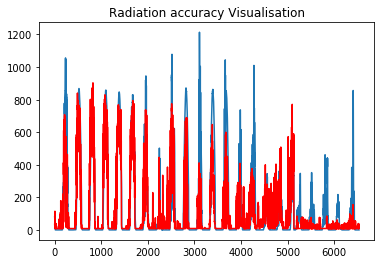

In [141]:
plt.title("Radiation accuracy Visualisation")
plt.plot(np.array(y_test))
plt.plot(np.array(pred4), color="red")